In [1]:
rm(list=ls())

In [2]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,576475,30.8,1250441,66.8,1110233,59.3
Vcells,1078577,8.3,8388608,64.0,1820939,13.9


In [20]:
# install.packages("tidyverse") # sagemaker has
library(tidyverse)
# install.packages("parallel") # sagemaker has
library(parallel)
# install.packages("cluster") # sagemaker has
library(cluster)

# install.packages("urca") # sagemaker doesn't have
library(urca)

# install.packages("forecast") # sagemaker doesn't have
library(forecast)

# install.packages("RcppArmadillo") # sagemaker doesn't have
library(RcppArmadillo)

# install.packages("Metrics") # sagemaker doesn't have
library(Metrics)

# install.packages("biglm") # sagemaker doesn't have
library(biglm)

# install.packages("tseries") # sagemaker doesn't have
library(tseries)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘RcppArmadillo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: DBI

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Read in and Subset Data

In [21]:
# Read in all files from the Data/Processed directory
england_fnames <- list.files("Data/Processed/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Processed/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Processed/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [22]:
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))    

In [23]:
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

In [24]:
set.seed(54321)
starting_points <- sample(1:((96*365)-(96*12*7)), 
                          length(total_df_list), 
                          replace=FALSE)
ending_points <- starting_points + (96*7*12) - 1

In [25]:
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [26]:
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [27]:
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

# Functions for Global AR Models

In [28]:
diff_volume <- function(data, lag=1){
    data <- data %>% mutate(lagged_total_volume = lag(total_volume, lag)) %>%
        mutate(original_total_volume = total_volume,
               total_volume = original_total_volume - lagged_total_volume)
    return_list <- list(data=data, lag=lag)
}

In [29]:
lag_embed <- function(data, lag=1) {
    
    n_test <- nrow(data %>% filter(train_val_test=="test"))
    n_val <- nrow(data %>% filter(train_val_test=="val"))
    
    embed_mat <- embed(data$total_volume, (lag+1))
    n_mat <- nrow(embed_mat)
    
    test_idx <- rev(1:n_mat)[1:n_test]
    val_idx <- rev(1:n_mat)[-c(1:n_test)][1:n_val]
    
    train_mat <- embed_mat[-c(val_idx, test_idx),]
    val_mat <- embed_mat[val_idx,]
    test_mat <- embed_mat[test_idx,]
    
    return_list <- list("train"=train_mat, "val"=val_mat, "test"=test_mat)
}

In [134]:
global_ar_least_squares <- function(train_list,
                                    val_list,
                                    return_train_preds=TRUE,
                                    return_val_preds=TRUE
                                   ) 
{
        
    model_formula <- paste(colnames(train_list[[1]][2:ncol(train_list[[1]])]), collapse='+')   
    model_formula <- paste(paste(colnames(train_list[[1]][1]),model_formula,sep="~"), "1", sep="-")    

    big_lm_mod <- biglm(as.formula(model_formula), train_list[[1]])    
    for (ts in 2:length(train_list)){
        big_lm_mod <- update(big_lm_mod, train_list[[ts]])
    }     
    
    train_preds <- data.frame()
    for (t in 1:length(train_list)) {
        pred <- data.frame(forec=predict(big_lm_mod, newdata=train_list[[t]]), ts_index=t)
        train_preds <- rbind(train_preds, pred)
    }
    
    val_preds <- data.frame()
    for (val_t in 1:length(val_list)) {
        val_pred <- data.frame(forec=predict(big_lm_mod, newdata=val_list[[val_t]]), ts_index=val_t)
        val_preds <- rbind(val_preds, val_pred)
    }
        
    train_rmse_ls <- c()
    train_mae_ls <- c()
    for (idx in 1:length(train_list)) {
        rmse_i <- rmse(train_list[[idx]][,1], (train_preds %>% filter(ts_index==idx))$forec)
        train_rmse_ls <- c(train_rmse_ls, rmse_i)

        mae_i <- mae(train_list[[idx]][,1], (train_preds %>% filter(ts_index==idx))$forec)
        train_mae_ls <- c(train_mae_ls, mae_i)
    }

    val_rmse_ls <- c()
    val_mae_ls <- c()
    for (idx in 1:length(val_list)) {
        rmse_val_i <- rmse(val_list[[idx]][,1], (val_preds %>% filter(ts_index==idx))$forec)
        val_rmse_ls <- c(val_rmse_ls, rmse_val_i)

        mae_val_i <- mae(val_list[[idx]][,1], (val_preds %>% filter(ts_index==idx))$forec)
        val_mae_ls <- c(val_mae_ls, mae_val_i)
    }
    
    return_list <- list("model"=big_lm_mod, 
                        "train_rmse"=train_rmse_ls, "train_mae"=train_mae_ls,
                        "val_rmse"=val_rmse_ls, "val_mae"=val_mae_ls)
    
    if (return_train_preds) {
        return_list <- append(return_list, list("train_preds"=train_preds))
    }

    if (return_val_preds) {
        return_list <- append(return_list, list("val_preds"=val_preds))
    } 
        
    return_list                                           
}

In [135]:
global_ar_least_squares_pred <- function(model,
                                         test_list,
                                         return_preds=TRUE
                                        ) 
{
    big_lm_mod <- model
    
    test_preds <- data.frame()
    for (test_t in 1:length(test_list)) {
        test_pred <- data.frame(forec=predict(big_lm_mod, newdata=test_list[[test_t]]), ts_index=test_t)
        test_preds <- rbind(test_preds, test_pred)
    }

    test_rmse_ls <- c()
    test_mae_ls <- c()
    for (idx in 1:length(test_list)) {
        rmse_test_i <- rmse(test_list[[idx]][,1], (test_preds %>% filter(ts_index==idx))$forec)
        test_rmse_ls <- c(test_rmse_ls, rmse_test_i)
    
        mae_test_i <- mae(test_list[[idx]][,1], (test_preds %>% filter(ts_index==idx))$forec)
        test_mae_ls <- c(test_mae_ls, mae_test_i)
    }
    
    return_list <- list("test_rmse"=test_rmse_ls, "test_mae"=test_mae_ls)
    
    if (return_preds) {
        return_list <- append(return_list, list("test_preds"=test_preds))
    }
    
    return_list        
}

In [ ]:
global_ar_least_squares_pred_undiff <- function(original_data_ls,
                                                diff_n=1,
                                                embed_lag=1,
                                                train_preds=NULL,
                                                val_preds=NULL,
                                                test_preds=NULL,
                                                return_rmse=TRUE,
                                                return_mae=TRUE
                                               )
{
    
    return_list <- list()
    
    if (!is.null(train_preds)) {    
        undiff_train_preds <- data.frame()

        train_rmse_ls <- c()
        train_mae_ls <- c()
        
        for (idx in 1:length(original_data_ls)) {
            
            xi <- original_data_ls[[idx]]$original_total_volume[c((embed_lag+1):(embed_lag+diff_n))]

            undiff_pred <- diffinv((train_preds %>% filter(ts_index==idx))$forec, 
                                   lag=diff_n, 
                                   xi=xi)

            undiff_pred_df <- data.frame(forec=undiff_pred, ts_index=idx)
            undiff_train_preds <- rbind(undiff_train_preds, undiff_pred_df)

            rmse_i <- rmse(undiff_pred[-c(1:diff_n)],
                           (original_data_ls[[idx]] %>% 
                                filter(train_val_test=="train"))$original_total_volume[-c(1:(diff_n+embed_lag))])
            train_rmse_ls <- c(train_rmse_ls, rmse_i)
            
            mae_i <- mae(undiff_pred[-c(1:diff_n)],
                           (original_data_ls[[idx]] %>% 
                                filter(train_val_test=="train"))$original_total_volume[-c(1:(diff_n+embed_lag))])
            train_mae_ls <- c(train_mae_ls, mae_i)

        }
           
        return_list <- append(return_list, list("undiff_train_preds"=undiff_train_preds))
        
        if (return_rmse) {
            return_list <- append(return_list, list("train_rmse"=train_rmse_ls))
        }
        
        if (return_mae) {
            return_list <- append(return_list, list("train_mae"=train_mae_ls))
        }
        
    }
    
    if (!is.null(val_preds)) {
        undiff_val_preds <- data.frame()
        
        val_rmse_ls <- c()
        val_mae_ls <- c()
        
        for (idx in 1:length(original_data_ls)) {
            
            xi_val <- tail((original_data_ls[[idx]] %>% 
                                filter(train_val_test=="train"))$original_total_volume, diff_n)
            
            undiff_pred_val <- diffinv((val_preds %>% filter(ts_index==idx))$forec, 
                                       lag=diff_n, 
                                       xi=xi_val)
            
            undiff_pred_val_df <- data.frame(forec=undiff_pred_val, ts_index=idx)
            undiff_val_preds <- rbind(undiff_val_preds, undiff_pred_val_df)
            
            rmse_val_i <- rmse(undiff_pred_val[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_val_test=="val"))$original_total_volume)
            val_rmse_ls <- c(val_rmse_ls, rmse_val_i)
            
            mae_val_i <- mae(undiff_pred_val[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_val_test=="val"))$original_total_volume)
            val_mae_ls <- c(val_mae_ls, mae_val_i)
        }
        
        return_list <- append(return_list, list("undiff_val_preds"=undiff_val_preds))
        
        if (return_rmse) {
            return_list <- append(return_list, list("val_rmse"=val_rmse_ls))
        }
        
        if (return_mae) {
            return_list <- append(return_list, list("val_mae"=val_mae_ls))
        }
    }
    
    if (!is.null(test_preds)) {
        undiff_test_preds <- data.frame()
        
        test_rmse_ls <- c()
        test_mae_ls <- c()
        
        for (idx in 1:length(original_data_ls)) {
            
            xi_test <- tail((original_data_ls[[idx]] %>% 
                                 filter(train_val_test=="val"))$original_total_volume, diff_n)
            
            undiff_pred_test <- diffinv((test_preds %>% filter(ts_index==idx))$forec, 
                                        lag=diff_n, 
                                        xi=xi_test)
            
            undiff_pred_test_df <- data.frame(forec=undiff_pred_test, ts_index=idx)
            undiff_test_preds <- rbind(undiff_test_preds, undiff_pred_test_df)
            
            rmse_test_i <- rmse(undiff_pred_test[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_test_test=="test"))$original_total_volume)
            test_rmse_ls <- c(test_rmse_ls, rmse_test_i)
            
            mae_test_i <- mae(undiff_pred_test[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_test_test=="test"))$original_total_volume)
            test_mae_ls <- c(test_mae_ls, mae_test_i)
        }
        
        return_list <- append(return_list, list("undiff_test_preds"=undiff_test_preds))
        
        if (return_rmse) {
            return_list <- append(return_list, list("test_rmse"=test_rmse_ls))
        }
        
        if (return_mae) {
            return_list <- append(return_list, list("test_mae"=test_mae_ls))
        }
    }
    
    return_list
}

# Deciding on the Best Differencing Scheme

In [201]:
set.seed(54321)
sample_idx <- sample(1:length(england_df_list), 1)

ts_sample <- total_df_list_samples[[sample_idx]] %>% filter(train_val_test=="train")

sample_highway_name <- str_split(ts_sample$site_name[1], '/')[[1]][1]
sample_sensor_name <- str_split(ts_sample$site_name[1], '/')[[1]][2]

In [222]:
original_ts_plot <- ggplot(ts_sample[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

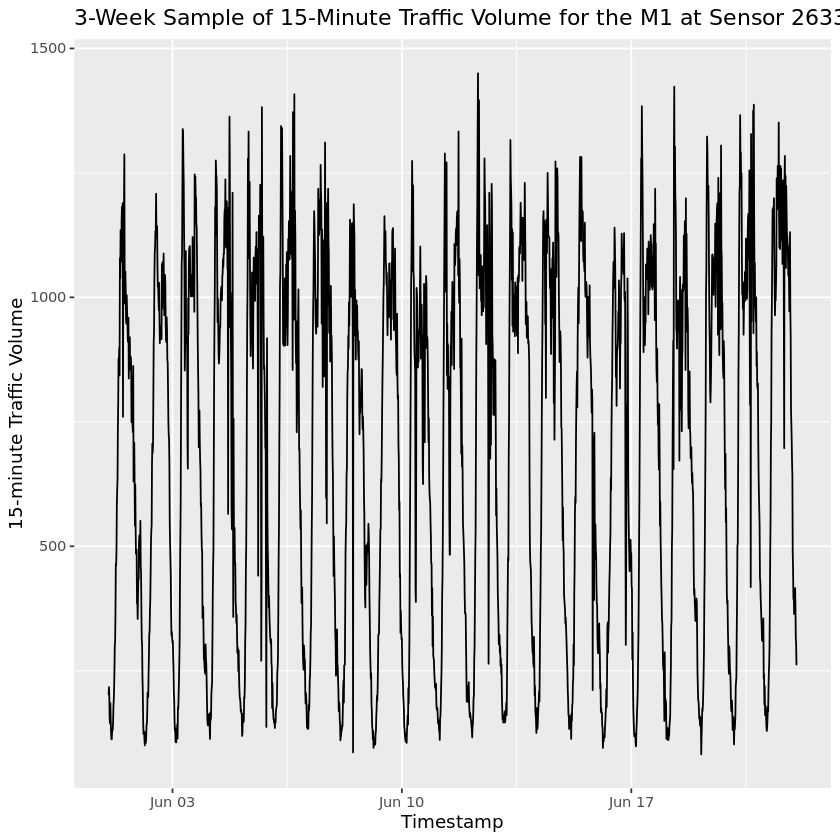

In [223]:
original_ts_plot

In [224]:
single_diff_ts_sample <- diff_volume(ts_sample)

In [225]:
single_diff_ts_plot <- ggplot(single_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Singly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Singly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

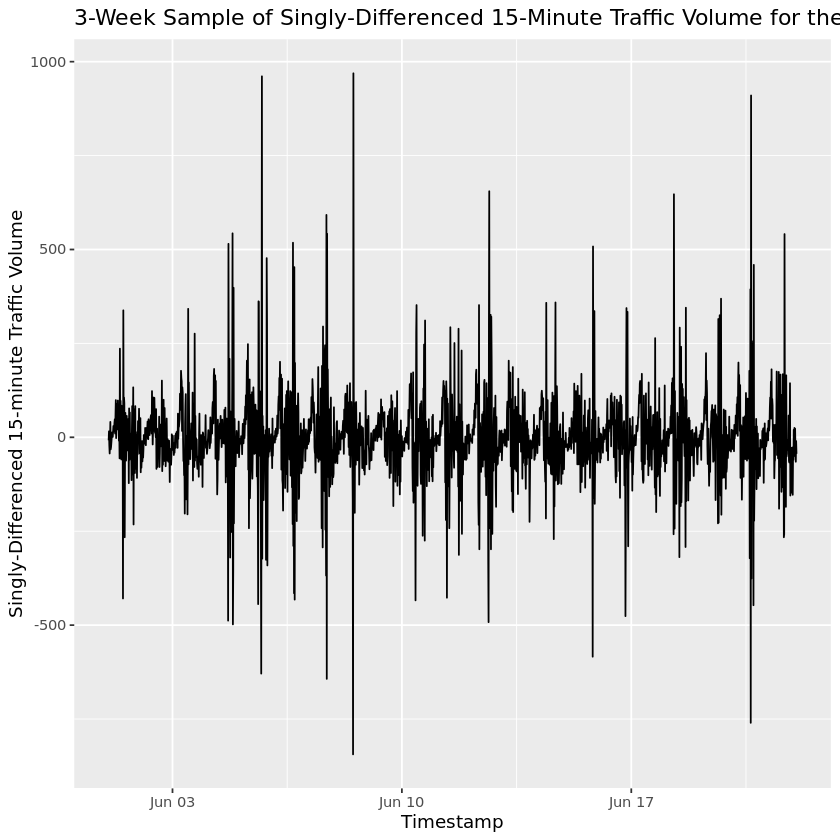

In [226]:
single_diff_ts_plot

In [227]:
double_diff_ts_samples <- diff_volume(single_diff_ts_sample$data)

In [228]:
double_diff_ts_plot <- ggplot(double_diff_ts_samples$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Twice-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Twice-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

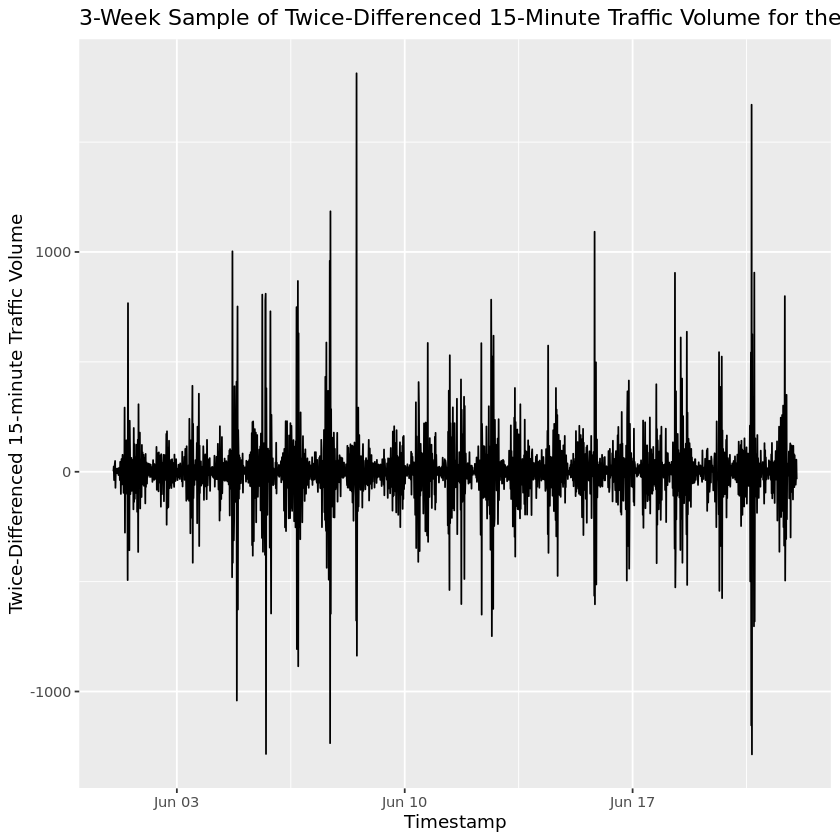

In [229]:
double_diff_ts_plot

In [230]:
weekly_diff_ts_sample <- diff_volume(ts_sample, lag=672)

In [231]:
weekly_diff_ts_plot <- ggplot(weekly_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Weekly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Weekly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

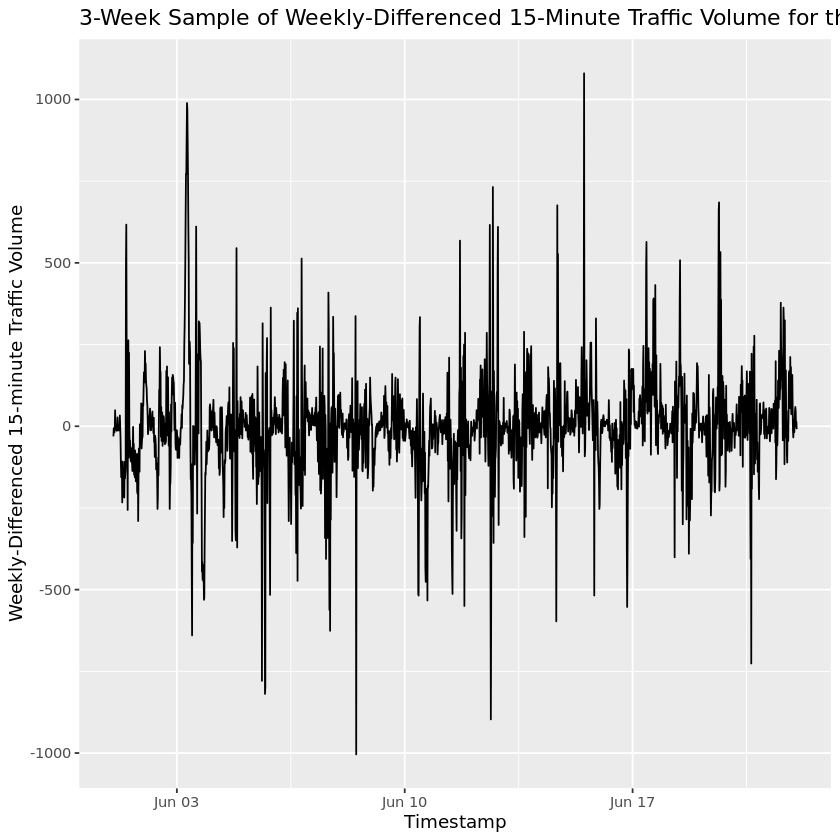

In [232]:
weekly_diff_ts_plot

In [233]:
weekly_singly_diff_ts_sample <- diff_volume(weekly_diff_ts_sample$data)

In [234]:
weekly_singly_diff_ts_plot <- ggplot(weekly_singly_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Weekly & Singly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Weekly & Singly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

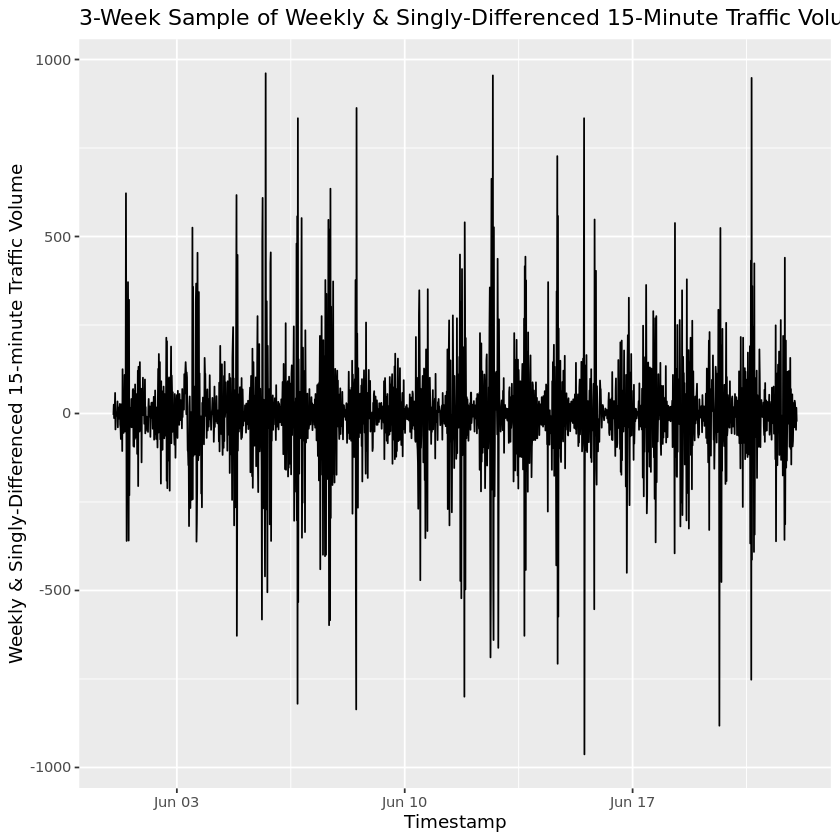

In [235]:
weekly_singly_diff_ts_plot

In [236]:
twice_weekly_diff_ts_sample <- diff_volume(weekly_diff_ts_sample$data, lag=672)

In [237]:
twice_weekly_diff_ts_plot <- ggplot(twice_weekly_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Twice Weekly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Twice Weekly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

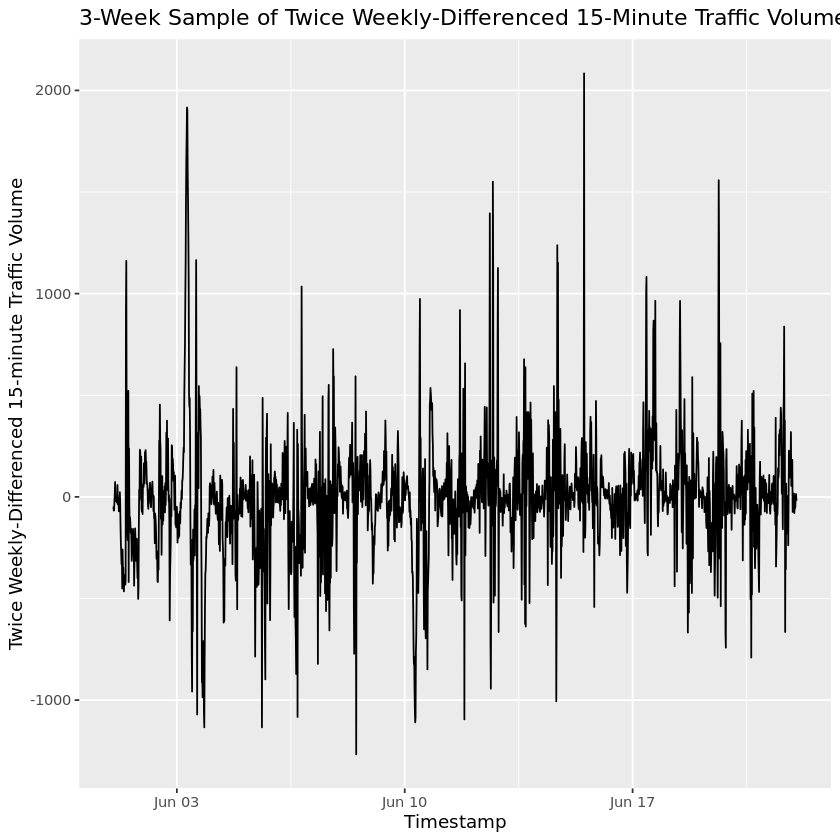

In [238]:
twice_weekly_diff_ts_plot

Plots are really ambiguous, need something more definitive like portmanteau tests

In [240]:
total_df_list_samples_train <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test=="train"))

In [257]:
kpss_cval <- ur.kpss(total_df_list_samples_train[[1]]$total_volume, use.lag=672)@cval[,2]

In [243]:
single_diff_train <- lapply(total_df_list_samples_train, function(x) diff_volume(x)$data)

In [250]:
single_diff_kpss <- lapply(single_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [258]:
mean(unlist(single_diff_kpss) < kpss_cval)

[1] 0.9473684

In [245]:
twice_diff_train <- lapply(single_diff_train, function(x) diff_volume(x)$data)

In [260]:
twice_diff_kpss <- lapply(twice_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [261]:
mean(unlist(twice_diff_kpss) < kpss_cval)

[1] 1

In [246]:
weekly_diff_train <- lapply(total_df_list_samples_train, function(x) diff_volume(x, 672)$data)

In [262]:
weekly_diff_kpss <- lapply(weekly_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [263]:
mean(unlist(weekly_diff_kpss) < kpss_cval)

[1] 0.9868421

In [248]:
twice_weekly_diff_train <- lapply(weekly_diff_train, function(x) diff_volume(x, 672)$data)

In [264]:
twice_weekly_diff_kpss <- lapply(twice_weekly_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [265]:
mean(unlist(twice_weekly_diff_kpss) < kpss_cval)

[1] 1

In [249]:
weekly_single_diff_train <- lapply(weekly_diff_train, function(x) diff_volume(x)$data)

In [266]:
weekly_single_diff_kpss <- lapply(weekly_single_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [267]:
mean(unlist(weekly_single_diff_kpss) < kpss_cval)

[1] 1

According to the kpss test, either twice differenced or once weekly differenced+one ordinary difference are the best choices
Even though twice weekly differenced also works, it results in substanially more data loss.

Let's also try the Augmented Dickey-Fuller test

In [272]:
adf_cval <- ur.df(total_df_list_samples_train[[1]]$total_volume, lags=672)@cval[,2]

In [275]:
single_diff_adf <- lapply(single_diff_train, function(x)
    ur.df(x$total_volume[-1], lags=672)@teststat
    )

In [276]:
mean(unlist(single_diff_adf) < adf_cval)

[1] 1

In [277]:
twice_diff_adf <- lapply(twice_diff_train, function(x)
    ur.df(x$total_volume[-c(1:2)], lags=672)@teststat
    )

In [278]:
mean(unlist(twice_diff_adf) < adf_cval)

[1] 1

In [279]:
weekly_diff_adf <- lapply(weekly_diff_train, function(x)
    ur.df(x$total_volume[-c(1:672)], lags=672)@teststat
    )

In [280]:
mean(unlist(weekly_diff_adf) < adf_cval)

[1] 0.9736842

In [282]:
twice_weekly_diff_adf <- lapply(twice_weekly_diff_train, function(x)
    ur.df(x$total_volume[-c(1:(672*2))], lags=672)@teststat
    )

In [283]:
mean(unlist(twice_weekly_diff_adf) < adf_cval)

[1] 1

In [284]:
weekly_single_diff_adf <- lapply(weekly_single_diff_train, function(x)
    ur.df(x$total_volume[-c(1:(672+1))], lags=672)@teststat
    )

In [285]:
mean(unlist(weekly_single_diff_adf) < adf_cval)

[1] 0.5789474

In [286]:
weekly_single_diff_adf

,tau1
statistic,-2.964241
,tau1
statistic,-3.066325
,tau1
statistic,-1.957771
,tau1
statistic,-2.355756
,tau1
statistic,-1.756908
,tau1


This does not add anything new to the mix. I guess we could try both differencing schemes and see which one results in better model performance

# Global AR Model - Full Data - Twice Differenced

In [118]:
diff_n <- 672

In [119]:
daily_diff_df_list <- lapply(total_df_list_samples, function(x) diff_volume(x, lag=diff_n)$data)

In [120]:
embed_lag <- 840

In [121]:
embed_mat_list <- lapply(daily_diff_df_list,
                 function(x) lag_embed(x, lag=embed_lag))
                         
embed_train_list <- lapply(embed_mat_list,
                           function(x) data.frame(x$train))
embed_val_list <- lapply(embed_mat_list,
                         function(x) data.frame(x$val))  
embed_test_list <- lapply(embed_mat_list,
                          function(x) data.frame(x$test))  

In [122]:
global_ar_mod <- global_ar_least_squares(embed_train_list, embed_val_list, TRUE, TRUE)

Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object l

Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”
Warning message in actual - predicted:
“longer object l

In [123]:
train_pred_1 <- global_ar_mod$train_preds %>% filter(ts_index==1)

In [124]:
head(train_pred_1)

,forec,ts_index
,<dbl>,<int>
673,5.450858,1
674,-34.415226,1
675,-3.477329,1
676,-3.419147,1
677,31.774110,1
678,-15.924875,1


In [129]:
undiff_test <- global_ar_least_squares_pred_undiff(daily_diff_df_list,
                                                   diff_n=diff_n,
                                                   embed_lag=embed_lag,
                                                   train_preds=global_ar_mod$train_preds,
                                                   val_preds=global_ar_mod$val_preds,
                                                   test_preds=NULL,
                                                   return_rmse=TRUE,
                                                   return_mae=TRUE)                                               

In [133]:
undiff_test$train_mae

[1] 26.133837 24.509241 25.389222 35.070732 34.465781 41.071900 13.845433
 [8] 15.363729 19.470593 20.748073 16.324784 25.610230 20.916108 15.342947
[15] 29.098703 24.658807 19.420364 18.233030 20.130409 87.592601 61.057159
[22] 26.142479 44.559752 44.665215 28.693246 25.998688 77.089012 75.634622
[29] 50.478746 16.677884 45.048203 38.190833 48.447639 48.986008 46.107242
[36] 60.931800 50.736472 37.047160 18.853967 24.887306 21.530402 46.635381
[43] 37.905157 30.110459 28.651649 25.271603 28.106953 27.753727  8.089971
[50] 13.649327 13.579399 19.460872 16.450231  6.159976  8.972168 33.838370
[57] 30.177778 31.068136 25.733838 40.510171 41.170356 11.869587  6.210227
[64] 35.378521 27.380650 14.306369 13.582413 18.393000 18.765903 16.015139
[71] 21.278957 15.029230 23.369680 20.835870 17.685730 18.922454

In [49]:
nrow(train_pred_1)

[1] 3864

In [50]:
diff_df_1 <- daily_diff_df_list[[1]]

In [51]:
head(diff_df_1)

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test,lagged_total_volume,original_total_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<dbl>
6310/1,2,2019-05-01,121,2019-05-01 14:59:00,59,66,NA,FALSE,FALSE,1,train,NA,306
6310/1,2,2019-05-01,121,2019-05-01 15:14:00,60,64,NA,FALSE,FALSE,2,train,NA,340
6310/1,2,2019-05-01,121,2019-05-01 15:29:00,61,68,NA,FALSE,FALSE,3,train,NA,297
6310/1,2,2019-05-01,121,2019-05-01 15:44:00,62,67,NA,FALSE,FALSE,4,train,NA,321
6310/1,2,2019-05-01,121,2019-05-01 15:59:00,63,66,NA,FALSE,FALSE,5,train,NA,335
6310/1,2,2019-05-01,121,2019-05-01 16:14:00,64,65,NA,FALSE,FALSE,6,train,NA,300


In [52]:
nrow(diff_df_1 %>% filter(train_val_test=="train") %>% filter(!is.na(total_volume)))

[1] 4704

In [107]:
head(global_ar_mod$val_preds)

,forec,ts_index
,<dbl>,<int>
1,-8,1
2,33,1
3,-5,1
4,34,1
5,60,1
6,-44,1


In [106]:
head(undiff_pred_val)

[1] 331 356 348 361 390 317

In [91]:
xi <- diff_df_1$original_total_volume[c((embed_lag+1):(embed_lag+diff_n))]

In [110]:
xi2 <- embed_train_list[[1]][,1][c(1:diff_n)]

In [113]:
xi

[1] 543 509 426 401 340 387 352 421 433 437 416 409 425 385 386 370 369 348
 [19] 384 407 356 364 406 401 384 349 367 367 366 377 391 427 398 282 546 373
 [37] 364 304 309 263 238 228 213 166 164 132 133 134 131  80  93  76  90  73
 [55]  59  67  62  61  41  44  41  38  24  20  20  13  31  18  14  21  29  28
 [73]  29  28  22  53  39  21  59  35  97  83  80 105 114 116 114 136 136 171
 [91] 172 192 170 207 214 267 281 289 317 424 366 379 355 355 377 404 368 335
[109] 369 375 369 337 334 268 316 305 302 305 303 310 294 286 298 300 296 230
[127] 270 248 271 297 259 252 249 223 203 211 184 166 161 119 121 106 115 115
[145]  95  94  74  78  66  73  69  61  72  69  77  61  47  46  37  38  33  42
[163]  26  20  19  10  25  25  30  44  32  41  33  37  49  50  53  60  79  74
[181]  90  81  93 100  95 137 131 137 148 154 178 201 224 214 262 262 265 302
[199] 342 390 355 346 418 397 430 400 412 377 386 369 346 362 350 343 372 318
[217] 409 363 411 401 475 454 457 425 449 509 432 446 391 406 413 393 371 302
[235] 291 317 291 249 201 218 166 156 133 138 103 104  91  69  68  40  43  33
[253]  28  30  16  25  13  14  15  13  10  13  26  20  32  44  45  46  54  70
[271]  89 104 162 204 250 300 335 409 438 553 628 691 763 658 743 753 761 627
[289] 589 553 483 436 369 375 413 351 387 374 375 372 372 356 364 344 375 344
[307] 381 368 373 325 361 318 359 321 350 337 343 342 335 401 336 315 331 353
[325] 343 308 286 230 201 176 180 137 138 113 107 114 103  90  79  68  60  73
[343]  60  49  49  46  52  26  26  24  17  19  18  15  10  13  12  14  22  22
[361]  24  42  31  37  62  74  71 111 101 151 207 267 312 297 380 476 582 717
[379] 674 687 737 744 732 695 576 555 469 416 347 321 347 319 298 271 267 307
[397] 292 260 255 267 281 307 305 299 279 264 302 292 310 348 326 332 357 468
[415] 463 447 445 379 401 373 335 291 261 237 191 181 185 158 117 118 109  90
[433]  98  96  84  63  85  73  65  65  41  48  36  30  24  26  24  21  21  28
[451]  18  10  12  20  22  22  26  35  37  38  50  62  81  97 132 152 192 237
[469] 240 293 365 501 563 656 724 684 755 760 704 683 581 538 501 414 363 341
[487] 317 360 274 326 341 291 285 275 337 280 252 273 296 297 290 298 293 320
[505] 278 338 369 341 349 343 397 375 366 359 358 391 339 316 279 280 234 224
[523] 178 168 127 115 140 109 105  97  87  82  56  74  65  56  43  36  41  22
[541]  29  17  27  25  13  22  18  17  17  15  18  22  25  32  31  56  53  61
[559]  85  95 110 136 221 231 247 329 378 459 549 619 685 739 708 711 733 684
[577] 608 535 486 417 401 359 361 345 284 334 344 319 317 292 264 304 285 320
[595] 302 325 326 309 337 314 342 352 359 385 335 392 351 329 384 363 399 359
[613] 334 270 285 264 233 205 193 146 143 127 147 155 184 169 105  89  68  79
[631]  68  57  65  52  59  55  26  21  25  29   9  21  16  15  14  18  23  29
[649]  29  39  39  46  58  61  83 105 110 133 174 216 227 279 335 395 466 539
[667] 609 631 670 639 598 596

In [114]:
xi2

[1]    7   66    9  -14  -72   52  -56   60   35   13   55  -42    9   -6   17
 [16]    5   23  -58   14   34  -14  -12   45   34  -15   -4    1   29   13  -12
 [31]  -14   40  -43 -141  142  -30    0  -47  -11  -45  -67  -16    1  -13  -16
 [46]  -46  -24   -1   22  -78  -87  -70  -39  -59  -56  -18  -55  -28  -53  -40
 [61]  -33  -16  -48  -29  -19  -45   -9  -17  -31  -20  -20    6    2   -9  -27
 [76]   19    5  -26    7  -12   40    7  -20    0    5  -23  -36  -26  -28  -16
 [91]  -39   -2  -59  -30  -72  -32  -39   -8  -59   48    3   33  -77  -40  -14
[106]    3   -9  -97  -27   17   -4   -8  -42  -80   -9    8  -21   44   18   47
[121]    4   11   45   33   45 -100  -46  -76  -96    0  -86  -71  -65 -105 -133
[136]  -28  -73  -24    4  -12  -12  -35   -9    4    2  -12  -25  -28  -35  -17
[151]  -32   -2   11  -10   22   23   -6    4   -4   -2    5   10    0   11   -5
[166]  -10    4    2    4   13   -6   -2   -4   -9    5   11    5   -9    4   10
[181]   33    5   -3    6    5   21   13   19    7  -30    9   -3    8    1    2
[196]   -6  -32  -41  -10   62   13  -34   36   28   78   50   51   29   55   67
[211]    3   62   69   61   91   35   98   72   84   91   95   13   44   20   66
[226]   15 -130  -96 -125  -51  -75   31   75   -1   27   60   55   52   14   50
[241]    2   26    7   16    1   -3   18   -6   -8  -19  -10  -19    1   -5   -7
[256]   -1  -13   -9   -4    0  -10   -1    6   -5    7   21    5   27   27   18
[271]   36   49  120  149  173  220  268  321  329  440  513  573  659  544  618
[286]  606  613  448  390  326  271  170   49   10  -10 -108  -82 -145 -165 -137
[301] -132 -160 -148 -187 -141 -177 -187 -234 -214 -181 -167 -243 -188 -258 -222
[316] -246 -212 -222 -181 -171 -173 -231 -180  -68  -47  -48  -77 -106 -149 -159
[331] -122 -147  -87 -162 -115  -95  -63  -46  -80  -48  -37   -8  -15   -1  -18
[346]   -1   -2   -8   -2   10   -2  -12    2    6   -3    3   -6   -8   -2   -6
[361]  -13    4  -20  -13   -8  -11  -28  -22  -57  -43  -88   -6  -27  -87  -61
[376]  -65   -5   -3 -144  -63  -51  -10  -35  -65 -100  -90  -63  -52  -77  -95
[391]   16  -20  -68  -57  -32  -54   -7  -62  -79  -55  -37   -2    1   -2  -18
[406]  -57   -7    0   18   13   14   33   44  111  144  127  132   33   25   75
[421]   14    3   28    4  -18   13   25   22   -7   27    3  -39    8  -31  -79
[436]  -47  -28  -24  -10   -7  -29  -28  -33  -35  -44  -51  -33  -34  -19  -13
[451]  -24  -25  -15  -33  -14  -27  -18  -29  -31  -44  -48  -39   -4    3   21
[466]  -13    4   -4  -45   19   -6   -2   27  -24   22    8   71   78  -28  -35
[481]  -74 -106   -2  -62  -22  -13  -21   40  -61   29   33  -57  -18  -18   52
[496]  -26  -45    0   -5    6  -28   20  -14   81    3   -8    5    7    8    6
[511]   41   57   36   61   20   52    0   37   16   26   -5   27   25   22   12
[526]    7   38   21   -1  -16  -47  -37  -61  -16  -31  -31  -42  -44  -17  -49
[541]  -38  -48  -16  -23  -27  -17  -31  -29  -18  -29  -25  -24  -33  -37  -38
[556]  -24  -51  -45  -60  -31    6  -40    9  -15  -25   17   25  -29  -17    2
[571]  -36   39   -1   -4   56    4   18  -56   14  -51   21   17   25   63  -41
[586]   -6   44   40   34   31  -10    2   -1   36  -12   24   16   -3   21  -32
[601]    9   27   58   50  -11   57    0  -43  -11   20  -27  -39  -15  -41  -40
[616]    1   -3  -13    9  -10  -26   11   44   13   43   17  -60  -44  -57  -37
[631]  -41  -57  -23  -25  -22  -25  -33  -45  -37  -27  -47  -30  -28  -32  -27
[646]  -27  -27  -21  -31  -35  -52  -48  -20    1   -4    4    7   -2   -6   -9
[661]   -3    6  -25  -31    3  -74   13  -25   97   -1  -44    8

In [92]:
undiff_pred <- diffinv(train_pred_1$forec, lag = diff_n, xi=xi)

In [93]:
head(undiff_pred)

[1] 543 509 426 401 340 387

In [94]:
rmse(undiff_pred[-c(1:diff_n)], 
     (diff_df_1 %>% filter(train_val_test=="train"))$original_total_volume[-c(1:(diff_n+embed_lag))])

[1] 37.08056

In [95]:
mae(undiff_pred[-c(1:diff_n)], 
     (diff_df_1 %>% filter(train_val_test=="train"))$original_total_volume[-c(1:(diff_n+embed_lag))])

[1] 26.13384

In [96]:
# Lag Embed + 1 : Lag Embed + Diff

In [97]:
val_pred_1 <- global_ar_mod$val_preds %>% filter(ts_index==1)

In [98]:
xi_val <- tail((diff_df_1 %>% filter(train_val_test=="train"))$original_total_volume,diff_n)
# rev(rev((diff_df_1 %>% filter(train_val_test=="train"))$original_total_volume)[c(1:diff_n)])

In [99]:
undiff_pred_val <- diffinv(val_pred_1$forec, lag = diff_n, xi=xi_val)

In [100]:
rmse(undiff_pred_val[-c(1:diff_n)],
    (diff_df_1 %>% filter(train_val_test=="val"))$original_total_volume)

[1] 52.71965

In [101]:
mae(undiff_pred_val[-c(1:diff_n)],
    (diff_df_1 %>% filter(train_val_test=="val"))$original_total_volume)

[1] 37.25096

In [64]:
summary(global_ar_mod$model)

Large data regression model: big_lm_mod <- biglm(as.formula(model_formula), train_list[[1]])
Sample size =  293664 
        Coef    (95%     CI)     SE      p
X2    0.4906  0.4869  0.4943 0.0018 0.0000
X3    0.1533  0.1492  0.1574 0.0021 0.0000
X4    0.0605  0.0563  0.0646 0.0021 0.0000
X5    0.0408  0.0367  0.0450 0.0021 0.0000
X6    0.0134  0.0092  0.0176 0.0021 0.0000
X7    0.0097  0.0055  0.0138 0.0021 0.0000
X8    0.0029 -0.0013  0.0070 0.0021 0.1706
X9    0.0172  0.0130  0.0213 0.0021 0.0000
X10   0.0086  0.0045  0.0128 0.0021 0.0000
X11  -0.0019 -0.0060  0.0023 0.0021 0.3693
X12   0.0022 -0.0019  0.0064 0.0021 0.2867
X13  -0.0055 -0.0097 -0.0013 0.0021 0.0082
X14  -0.0104 -0.0146 -0.0063 0.0021 0.0000
X15   0.0015 -0.0026  0.0057 0.0021 0.4574
X16   0.0090  0.0048  0.0131 0.0021 0.0000
X17  -0.0008 -0.0050  0.0033 0.0021 0.6946
X18  -0.0108 -0.0150 -0.0067 0.0021 0.0000
X19   0.0048  0.0006  0.0090 0.0021 0.0213
X20   0.0077  0.0035  0.0119 0.0021 0.0002
X21  -0.0033 -0.0075  0.

In [65]:
test_pred_1 <- global_ar_least_squares_pred(global_ar_mod$model,
                                            embed_test_list,
                                            return_preds=TRUE)

In [70]:
xi_test <- tail((diff_df_1 %>% filter(train_val_test=="val"))$original_total_volume,diff_n)
# rev(rev((diff_df_1 %>% filter(train_val_test=="train"))$original_total_volume)[c(1:diff_n)])

In [74]:
undiff_pred_test <- diffinv((test_pred_1$test_preds %>% filter(ts_index==1))$forec,
                            lag = diff_n, 
                            xi=xi_test)

In [75]:
rmse(undiff_pred_test[-c(1:diff_n)],
    (diff_df_1 %>% filter(train_val_test=="test"))$original_total_volume)

[1] 51.39511

In [76]:
mae(undiff_pred_test[-c(1:diff_n)],
    (diff_df_1 %>% filter(train_val_test=="test"))$original_total_volume)

[1] 38.37174

In [41]:
lag_list <- c(1,2,4,24,48,60,96,120,192,240,288,360,384,480,576,600,672,720,768,840,960)

In [42]:
mean_train_rmse <- c()
median_train_rmse <- c()
mean_train_mae <- c()
median_train_mae <- c()

mean_val_rmse <- c()
median_val_rmse <- c()
mean_val_mae <- c()
median_val_mae <- c()

for (lag in lag_list) {
    
    embed_mat_list <- lapply(total_df_list_samples,
                     function(x) lag_embed(x, lag=lag))
    embed_train_list <- lapply(embed_mat_list,
                               function(x) data.frame(x$train))
    embed_val_list <- lapply(embed_mat_list,
                             function(x) data.frame(x$val))    
                             
    global_ar_mod <- global_ar_least_squares(embed_train_list, embed_val_list, FALSE, FALSE)
                             
    train_rmse_mean <- mean(global_ar_mod$train_rmse)
    train_rmse_median <- median(global_ar_mod$train_rmse) 
    train_mae_mean <- mean(global_ar_mod$train_mae)
    train_mae_median <- median(global_ar_mod$train_mae)   
                             
    val_rmse_mean <- mean(global_ar_mod$val_rmse)
    val_rmse_median <- median(global_ar_mod$val_rmse)                                 
    val_mae_mean <- mean(global_ar_mod$val_mae)
    val_mae_median <- median(global_ar_mod$val_mae)  
                             
    mean_train_rmse <- c(mean_train_rmse, train_rmse_mean)      
    median_train_rmse <- c(median_train_rmse, train_rmse_median)                        
    mean_train_mae <- c(mean_train_mae, train_mae_mean)      
    median_train_mae <- c(median_train_mae, train_mae_median)                        
                             
    mean_val_rmse <- c(mean_val_rmse, val_rmse_mean)                         
    median_val_rmse <- c(median_val_rmse, val_rmse_median)                               
    mean_val_mae <- c(mean_val_mae, val_mae_mean)                         
    median_val_mae <- c(median_val_mae, val_mae_median)
                             
    print(lag)
    flush.console()                          
}

[1] 1
[1] 2
[1] 4
[1] 24
[1] 48
[1] 60
[1] 96
[1] 120
[1] 192
[1] 240
[1] 288
[1] 360
[1] 384
[1] 480
[1] 576
[1] 600
[1] 672
[1] 720
[1] 768
[1] 840
[1] 960


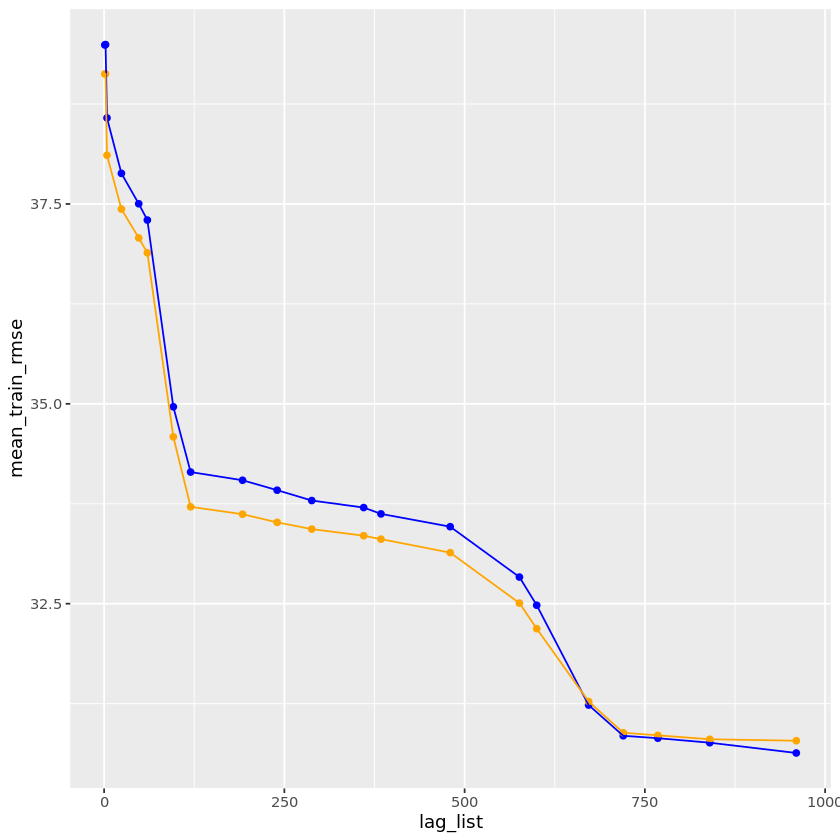

In [43]:
ggplot() + 
    geom_point(aes(x=lag_list, y=mean_train_rmse), col="blue") + 
    geom_point(aes(x=lag_list, y=mean_val_rmse), col="orange") +
    geom_line(aes(x=lag_list, y=mean_train_rmse), col="blue") + 
    geom_line(aes(x=lag_list, y=mean_val_rmse), col="orange") 

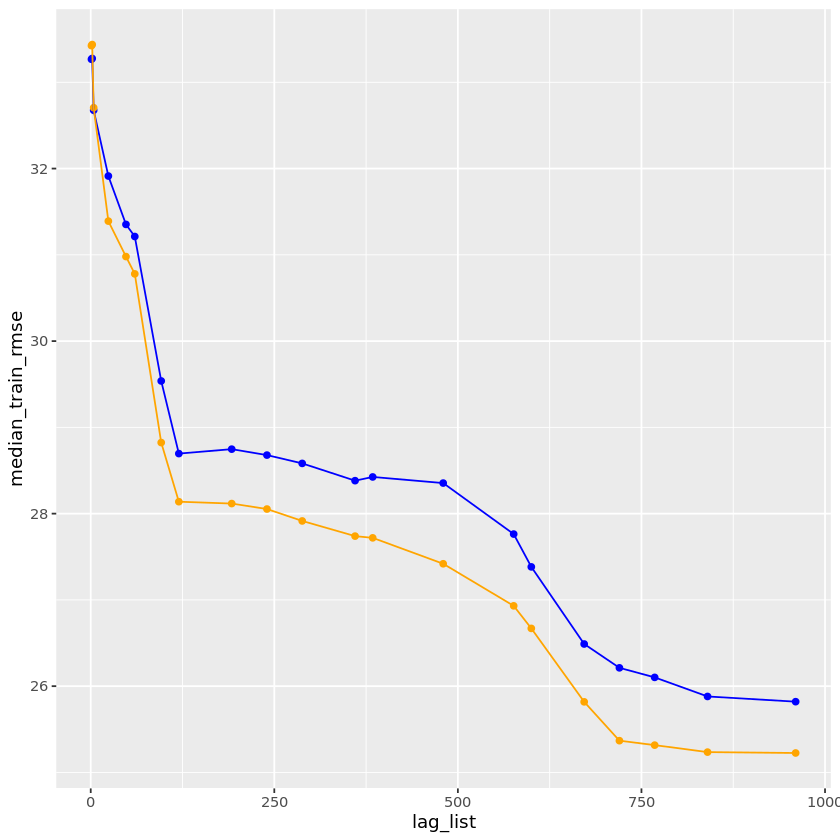

In [44]:
ggplot() + 
    geom_point(aes(x=lag_list, y=median_train_rmse), col="blue") + 
    geom_point(aes(x=lag_list, y=median_val_rmse), col="orange") +
    geom_line(aes(x=lag_list, y=median_train_rmse), col="blue") + 
    geom_line(aes(x=lag_list, y=median_val_rmse), col="orange")

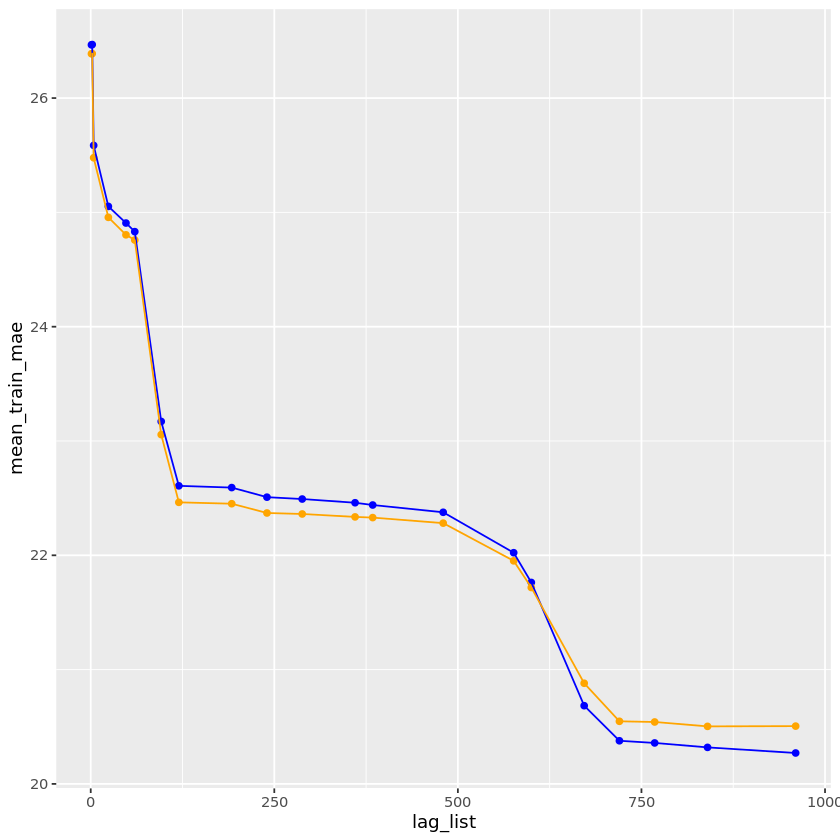

In [45]:
ggplot() + 
    geom_point(aes(x=lag_list, y=mean_train_mae), col="blue") + 
    geom_point(aes(x=lag_list, y=mean_val_mae), col="orange") +
    geom_line(aes(x=lag_list, y=mean_train_mae), col="blue") + 
    geom_line(aes(x=lag_list, y=mean_val_mae), col="orange") 

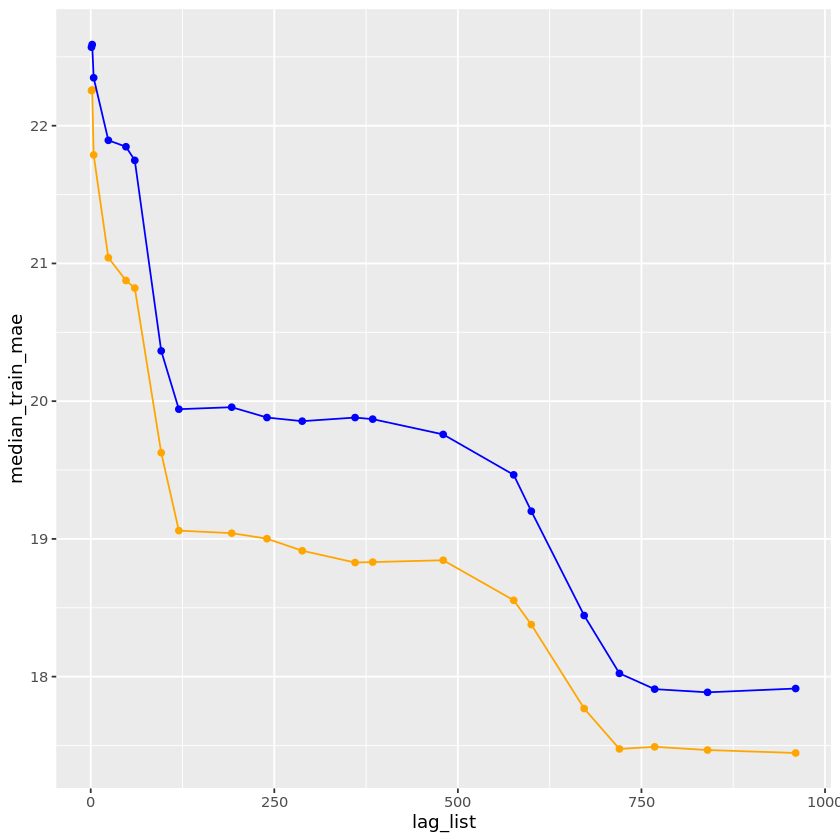

In [46]:
ggplot() + 
    geom_point(aes(x=lag_list, y=median_train_mae), col="blue") + 
    geom_point(aes(x=lag_list, y=median_val_mae), col="orange") +
    geom_line(aes(x=lag_list, y=median_train_mae), col="blue") + 
    geom_line(aes(x=lag_list, y=median_val_mae), col="orange")

In [50]:
global_lag_perf_df <- data.frame(lag=lag_list, 
                                 mean_train_rmse=mean_train_rmse, median_train_rmse=median_train_rmse,
                                 mean_train_mae=mean_train_mae, median_train_mae=median_train_mae,
                                 mean_val_rmse=mean_val_rmse, median_val_rmse=median_val_rmse,
                                 mean_val_mae=mean_val_mae, median_val_mae=median_val_mae
                                )

In [51]:
write.csv(global_lag_perf_df, "Results/Pooled Regression Full/lag_performance.csv", row.names=FALSE)

## Final Global AR Model - Full Data

In [31]:
embed_mat_list <- lapply(total_df_list_samples,
                     function(x) lag_embed(x, lag=840))
embed_train_list <- lapply(embed_mat_list,
                           function(x) data.frame(x$train))
embed_val_list <- lapply(embed_mat_list,
                         function(x) data.frame(x$val))   
embed_test_list <- lapply(embed_mat_list,
                          function(x) data.frame(x$test))                             

In [77]:
global_ar_final <- global_ar_least_squares(embed_train_list, embed_val_list)

In [68]:
saveRDS(global_ar_final, "Results/Pooled Regression Full/global_ar_model.RData")

In [80]:
mean(global_ar_final$train_rmse)

[1] 30.76145

In [81]:
mean(global_ar_final$train_mae)

[1] 20.31943

In [82]:
mean(global_ar_final$val_rmse)

[1] 30.80469

In [83]:
mean(global_ar_final$val_mae)

[1] 20.50319

## Global AR Model Test Predictions - Full Data

In [79]:
global_ar_final_test_preds <- global_ar_least_squares_pred(global_ar_final$model, embed_test_list)

In [84]:
mean(global_ar_final_test_preds$test_rmse)

[1] 31.61228

In [85]:
mean(global_ar_final_test_preds$test_mae)

[1] 20.92128

In [87]:
saveRDS(global_ar_final_test_preds, "Results/Pooled Regression Full/global_ar_model_test_pred.RData")

# Global AR Model - Random Clustering

In [88]:
random_clust <- read_csv('Results/Clustering/Random/random_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, random_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [90]:
head(random_clust)

ts_index,random_clust_assign
<dbl>,<dbl>
1,4
2,4
3,4
4,4
5,3
6,4


In [98]:
embed_train_list_rand_clust_1 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_train_list_rand_clust_2 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_train_list_rand_clust_3 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_train_list_rand_clust_4 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]


In [99]:
embed_val_list_rand_clust_1 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_val_list_rand_clust_2 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_val_list_rand_clust_3 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_val_list_rand_clust_4 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]


In [100]:
embed_test_list_rand_clust_1 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_test_list_rand_clust_2 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_test_list_rand_clust_3 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_test_list_rand_clust_4 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]


In [102]:
global_ar_rand_clust_1 <- global_ar_least_squares(embed_train_list_rand_clust_1, embed_val_list_rand_clust_1)
global_ar_rand_clust_2 <- global_ar_least_squares(embed_train_list_rand_clust_2, embed_val_list_rand_clust_2)
global_ar_rand_clust_3 <- global_ar_least_squares(embed_train_list_rand_clust_3, embed_val_list_rand_clust_3)
global_ar_rand_clust_4 <- global_ar_least_squares(embed_train_list_rand_clust_4, embed_val_list_rand_clust_4)

In [103]:
saveRDS(global_ar_rand_clust_1, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_1.RData")

saveRDS(global_ar_rand_clust_2, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_2.RData")

saveRDS(global_ar_rand_clust_3, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_3.RData")

saveRDS(global_ar_rand_clust_4, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_4.RData")

In [154]:
mean(global_ar_rand_clust_1$train_rmse)

[1] 22.08005

In [155]:
mean(global_ar_rand_clust_2$train_rmse)

[1] 28.70896

In [156]:
mean(global_ar_rand_clust_3$train_rmse)

[1] 32.06991

In [157]:
mean(global_ar_rand_clust_4$train_rmse)

[1] 39.45434

In [158]:
mean(global_ar_rand_clust_1$val_rmse)

[1] 22.71413

In [159]:
mean(global_ar_rand_clust_2$val_rmse)

[1] 30.59514

In [160]:
mean(global_ar_rand_clust_3$val_rmse)

[1] 31.24323

In [161]:
mean(global_ar_rand_clust_4$val_rmse)

[1] 39.11617

## Test Preds

In [104]:
global_ar_rand_clust_1_preds <- global_ar_least_squares_pred(global_ar_rand_clust_1$model, 
                                                             embed_test_list_rand_clust_1)

global_ar_rand_clust_2_preds <- global_ar_least_squares_pred(global_ar_rand_clust_2$model, 
                                                             embed_test_list_rand_clust_2)

global_ar_rand_clust_3_preds <- global_ar_least_squares_pred(global_ar_rand_clust_3$model, 
                                                             embed_test_list_rand_clust_3)

global_ar_rand_clust_4_preds <- global_ar_least_squares_pred(global_ar_rand_clust_4$model, 
                                                             embed_test_list_rand_clust_4)

In [105]:
mean(global_ar_rand_clust_1_preds$test_rmse)

[1] 22.78795

In [106]:
mean(global_ar_rand_clust_2_preds$test_rmse)

[1] 29.95613

In [107]:
mean(global_ar_rand_clust_3_preds$test_rmse)

[1] 33.02688

In [108]:
mean(global_ar_rand_clust_4_preds$test_rmse)

[1] 41.58205

In [110]:
mean(c(global_ar_rand_clust_1_preds$test_rmse,
       global_ar_rand_clust_2_preds$test_rmse,
       global_ar_rand_clust_3_preds$test_rmse,
       global_ar_rand_clust_4_preds$test_rmse
      ))

[1] 31.83825

In [111]:
mean(global_ar_rand_clust_1_preds$test_mae)

[1] 15.39477

In [112]:
mean(global_ar_rand_clust_2_preds$test_mae)

[1] 20.28148

In [113]:
mean(global_ar_rand_clust_3_preds$test_mae)

[1] 22.07571

In [114]:
mean(global_ar_rand_clust_4_preds$test_mae)

[1] 27.08559

In [115]:
mean(c(global_ar_rand_clust_1_preds$test_mae,
       global_ar_rand_clust_2_preds$test_mae,
       global_ar_rand_clust_3_preds$test_mae,
       global_ar_rand_clust_4_preds$test_mae
      ))

[1] 21.20939

In [117]:
saveRDS(global_ar_rand_clust_1_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_1_test_pred.RData")

saveRDS(global_ar_rand_clust_2_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_2_test_pred.RData")

saveRDS(global_ar_rand_clust_3_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_3_test_pred.RData")

saveRDS(global_ar_rand_clust_4_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_4_test_pred.RData")

# Global AR Model - KMeans Catch22 Clustering

In [147]:
kmeans_catch22_clust <- read_csv('Results/Clustering/KMeans/kmeans_catch22_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, kmeans_catch22_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [148]:
head(kmeans_catch22_clust)

ts_index,kmeans_catch22_clust_assign
<dbl>,<dbl>
1,1
2,1
3,1
4,1
5,1
6,1


In [149]:
max(kmeans_catch22_clust$kmeans_catch22_clust_assign)

[1] 2

In [150]:
embed_train_list_kmeans_catch22_clust_1 <- embed_train_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_train_list_kmeans_catch22_clust_2 <- embed_train_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]

In [151]:
embed_val_list_kmeans_catch22_clust_1 <- embed_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_val_list_kmeans_catch22_clust_2 <- embed_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]

In [152]:
embed_test_list_kmeans_catch22_clust_1 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_test_list_kmeans_catch22_clust_2 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]

In [153]:
global_ar_kmeans_catch22_clust_1 <- global_ar_least_squares(embed_train_list_kmeans_catch22_clust_1, 
                                                            embed_val_list_kmeans_catch22_clust_1)
global_ar_kmeans_catch22_clust_2 <- global_ar_least_squares(embed_train_list_kmeans_catch22_clust_2, 
                                                            embed_val_list_kmeans_catch22_clust_2)

In [172]:
saveRDS(global_ar_kmeans_catch22_clust_1, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_clust_1.RData")

saveRDS(global_ar_kmeans_catch22_clust_2, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_clust_2.RData")

## Test Preds

In [163]:
global_ar_kmeans_catch22_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_1$model, 
                                                                           embed_test_list_kmeans_catch22_clust_1)

global_ar_kmeans_catch22_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_2$model, 
                                                                           embed_test_list_kmeans_catch22_clust_2)

In [164]:
mean(global_ar_kmeans_catch22_clust_1_test_pred$test_rmse)

[1] 32.17982

In [165]:
mean(global_ar_kmeans_catch22_clust_2_test_pred$test_rmse)

[1] 30.48896

In [166]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_2_test_pred$test_rmse
      ))

[1] 31.69036

In [167]:
mean(global_ar_kmeans_catch22_clust_1_test_pred$test_mae)

[1] 21.44171

In [168]:
mean(global_ar_kmeans_catch22_clust_2_test_pred$test_mae)

[1] 20.0722

In [169]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_2_test_pred$test_mae
      ))

[1] 21.04528

In [171]:
saveRDS(global_ar_kmeans_catch22_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_clust_1_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_clust_2_test_pred.RData")

# Global AR Model - KMeans Catch22 Clustering w Mean and Variance

In [180]:
kmeans_catch22_mv_clust <- read_csv('Results/Clustering/KMeans/kmeans_catch22_mean_var_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, kmeans_catch22_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [181]:
max(kmeans_catch22_mv_clust$kmeans_catch22_clust_assign)

[1] 5

In [182]:
embed_train_list_kmeans_catch22_mv_clust_1 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_2 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_3 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_4 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_5 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [183]:
embed_val_list_kmeans_catch22_mv_clust_1 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_2 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_3 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_4 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_5 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [184]:
embed_test_list_kmeans_catch22_mv_clust_1 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_2 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_3 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_4 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_5 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [185]:
global_ar_kmeans_catch22_mv_clust_1 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_1,
                                                               embed_val_list_kmeans_catch22_mv_clust_1)

global_ar_kmeans_catch22_mv_clust_2 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_2, 
                                                               embed_val_list_kmeans_catch22_mv_clust_2)

global_ar_kmeans_catch22_mv_clust_3 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_3,
                                                               embed_val_list_kmeans_catch22_mv_clust_3)

global_ar_kmeans_catch22_mv_clust_4 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_4, 
                                                               embed_val_list_kmeans_catch22_mv_clust_4)

global_ar_kmeans_catch22_mv_clust_5 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_5,
                                                               embed_val_list_kmeans_catch22_mv_clust_5)

In [186]:
saveRDS(global_ar_kmeans_catch22_mv_clust_1, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_1.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_2, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_2.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_3, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_3.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_4, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_4.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_5, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_5.RData")


## Test Preds

In [187]:
global_ar_kmeans_catch22_mv_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_1$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_1)

global_ar_kmeans_catch22_mv_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_2$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_2)

global_ar_kmeans_catch22_mv_clust_3_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_3$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_3)

global_ar_kmeans_catch22_mv_clust_4_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_4$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_4)

global_ar_kmeans_catch22_mv_clust_5_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_5$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_5)


In [188]:
mean(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_rmse)

[1] 42.76768

In [189]:
mean(global_ar_kmeans_catch22_mv_clust_2_test_pred$test_rmse)

[1] 78.96979

In [190]:
mean(global_ar_kmeans_catch22_mv_clust_3_test_pred$test_rmse)

[1] 21.92167

In [191]:
mean(global_ar_kmeans_catch22_mv_clust_4_test_pred$test_rmse)

[1] 20.98901

In [192]:
mean(global_ar_kmeans_catch22_mv_clust_5_test_pred$test_rmse)

[1] 21.74914

In [193]:
mean(c(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_2_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_3_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_4_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_5_test_pred$test_rmse))

[1] 31.54717

In [194]:
mean(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_mae)

[1] 28.21824

In [195]:
mean(global_ar_kmeans_catch22_mv_clust_2_test_pred$test_mae)

[1] 50.47029

In [196]:
mean(global_ar_kmeans_catch22_mv_clust_3_test_pred$test_mae)

[1] 14.77393

In [197]:
mean(global_ar_kmeans_catch22_mv_clust_4_test_pred$test_mae)

[1] 14.48005

In [198]:
mean(global_ar_kmeans_catch22_mv_clust_5_test_pred$test_mae)

[1] 14.31248

In [199]:
mean(c(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_2_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_3_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_4_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_5_test_pred$test_mae))

[1] 21.03749

In [200]:
saveRDS(global_ar_kmeans_catch22_mv_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_1_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_2_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_3_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_3_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_4_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_4_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_5_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_5_test_pred.RData")


# Global AR Model - GMM Using Catch22

In [27]:
gmm_catch22_clust <- read_csv('Results/Clustering/GMM/gmm_catch22_clustering_assign.csv')

Rows: 76 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ts_index, gmm_catch22_clust_assign, uncertainty


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [28]:
max(gmm_catch22_clust$gmm_catch22_clust_assign)

[1] 2

In [29]:
gmm_catch22_clust %>% group_by(gmm_catch22_clust_assign) %>% summarise(n())

gmm_catch22_clust_assign,n()
<dbl>,<int>
1,54
2,22


In [33]:
embed_train_list_gmm_catch22_clust_1 <- embed_train_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_train_list_gmm_catch22_clust_2 <- embed_train_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]


In [34]:
embed_val_list_gmm_catch22_clust_1 <- embed_val_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_val_list_gmm_catch22_clust_2 <- embed_val_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [35]:
embed_test_list_gmm_catch22_clust_1 <- embed_test_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_test_list_gmm_catch22_clust_2 <- embed_test_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [36]:
global_ar_gmm_catch22_clust_1 <- global_ar_least_squares(embed_train_list_gmm_catch22_clust_1,
                                                         embed_val_list_gmm_catch22_clust_1)

global_ar_gmm_catch22_clust_2 <- global_ar_least_squares(embed_train_list_gmm_catch22_clust_2,
                                                         embed_val_list_gmm_catch22_clust_2)

In [37]:
saveRDS(global_ar_gmm_catch22_clust_1, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_clust_1.RData")

saveRDS(global_ar_gmm_catch22_clust_2, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_clust_2.RData")


## Test Preds

In [38]:
global_ar_gmm_catch22_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_clust_1$model,
                                                                        embed_test_list_gmm_catch22_clust_1)

global_ar_gmm_catch22_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_clust_2$model,
                                                                        embed_test_list_gmm_catch22_clust_2)
                                                                        

In [39]:
mean(global_ar_gmm_catch22_clust_1_test_pred$test_rmse)

[1] 29.17146

In [40]:
mean(global_ar_gmm_catch22_clust_2_test_pred$test_rmse)

[1] 37.98074

In [41]:
mean(c(global_ar_gmm_catch22_clust_1_test_pred$test_rmse,
       global_ar_gmm_catch22_clust_2_test_pred$test_rmse))

[1] 31.72151

In [42]:
mean(global_ar_gmm_catch22_clust_1_test_pred$test_mae)

[1] 19.55924

In [43]:
mean(global_ar_gmm_catch22_clust_2_test_pred$test_mae)

[1] 24.72772

In [44]:
mean(c(global_ar_gmm_catch22_clust_1_test_pred$test_mae,
       global_ar_gmm_catch22_clust_2_test_pred$test_mae))

[1] 21.05538

In [45]:
saveRDS(global_ar_gmm_catch22_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_clust_1_test_pred.RData")

saveRDS(global_ar_gmm_catch22_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_clust_2_test_pred.RData")

# Global AR Model - GMM Using Catch22 w Mean and Variance

In [46]:
gmm_catch22_mv_clust <- read_csv("Results/Clustering/GMM/gmm_catch22_mean_var_clustering_assign.csv")

Rows: 76 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ts_index, gmm_catch22_clust_assign, uncertainty


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [47]:
max(gmm_catch22_mv_clust$gmm_catch22_clust_assign)

[1] 2

In [48]:
gmm_catch22_mv_clust %>% group_by(gmm_catch22_clust_assign) %>% summarise(n())

gmm_catch22_clust_assign,n()
<dbl>,<int>
1,57
2,19


In [49]:
embed_train_list_gmm_catch22_mv_clust_1 <- embed_train_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_train_list_gmm_catch22_mv_clust_2 <- embed_train_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]


In [51]:
embed_val_list_gmm_catch22_mv_clust_1 <- embed_val_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_val_list_gmm_catch22_mv_clust_2 <- embed_val_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [50]:
embed_test_list_gmm_catch22_mv_clust_1 <- embed_test_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_test_list_gmm_catch22_mv_clust_2 <- embed_test_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [52]:
global_ar_gmm_catch22_mv_clust_1 <- global_ar_least_squares(embed_train_list_gmm_catch22_mv_clust_1,
                                                            embed_val_list_gmm_catch22_mv_clust_1)

global_ar_gmm_catch22_mv_clust_2 <- global_ar_least_squares(embed_train_list_gmm_catch22_mv_clust_2,
                                                            embed_val_list_gmm_catch22_mv_clust_2)

In [53]:
saveRDS(global_ar_gmm_catch22_mv_clust_1, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_mv_clust_1.RData")

saveRDS(global_ar_gmm_catch22_mv_clust_2, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_mv_clust_2.RData")


## Test Preds

In [54]:
global_ar_gmm_catch22_mv_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_mv_clust_1$model,
                                                                           embed_test_list_gmm_catch22_mv_clust_1)

global_ar_gmm_catch22_mv_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_mv_clust_2$model,
                                                                           embed_test_list_gmm_catch22_mv_clust_2)

In [55]:
mean(global_ar_gmm_catch22_mv_clust_1_test_pred$test_rmse)

[1] 29.77561

In [56]:
mean(global_ar_gmm_catch22_mv_clust_2_test_pred$test_rmse)

[1] 37.4103

In [57]:
mean(c(global_ar_gmm_catch22_mv_clust_1_test_pred$test_rmse,
       global_ar_gmm_catch22_mv_clust_2_test_pred$test_rmse))

[1] 31.68428

In [58]:
mean(global_ar_gmm_catch22_mv_clust_1_test_pred$test_mae)

[1] 19.97753

In [59]:
mean(global_ar_gmm_catch22_mv_clust_2_test_pred$test_mae)

[1] 24.21864

In [60]:
mean(c(global_ar_gmm_catch22_mv_clust_1_test_pred$test_mae,
       global_ar_gmm_catch22_mv_clust_2_test_pred$test_mae))

[1] 21.03781

In [61]:
saveRDS(global_ar_gmm_catch22_mv_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_mv_clust_1_test_pred.RData")

saveRDS(global_ar_gmm_catch22_mv_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_mv_clust_2_test_pred.RData")

# Global AR Model - DTW

In [62]:
dtw_clust <- read_csv('Results/Clustering/DTW/dtw_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, dtw_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [63]:
max(dtw_clust$dtw_clust_assign)

[1] 2

In [64]:
dtw_clust %>% group_by(dtw_clust_assign) %>% summarise(n())

dtw_clust_assign,n()
<dbl>,<int>
1,25
2,51


In [65]:
embed_train_list_dtw_clust_1 <- embed_train_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_train_list_dtw_clust_2 <- embed_train_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 2))$ts_index)]

In [67]:
embed_val_list_dtw_clust_1 <- embed_val_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_val_list_dtw_clust_2 <- embed_val_list[c((dtw_clust %>% 
                                                 filter(dtw_clust_assign == 2))$ts_index)]

In [68]:
embed_test_list_dtw_clust_1 <- embed_test_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_test_list_dtw_clust_2 <- embed_test_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 2))$ts_index)]

In [69]:
global_ar_dtw_clust_1 <- global_ar_least_squares(embed_train_list_dtw_clust_1,
                                                 embed_val_list_dtw_clust_1)

global_ar_dtw_clust_2 <- global_ar_least_squares(embed_train_list_dtw_clust_2,
                                                 embed_val_list_dtw_clust_2)

In [70]:
saveRDS(global_ar_dtw_clust_1, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_1.RData")

saveRDS(global_ar_dtw_clust_2, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_2.RData")

## Test Preds

In [71]:
global_ar_dtw_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_dtw_clust_1$model,
                                                                embed_test_list_dtw_clust_1)

global_ar_dtw_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_dtw_clust_2$model,
                                                                embed_test_list_dtw_clust_2)

In [72]:
mean(global_ar_dtw_clust_1_test_pred$test_rmse)

[1] 53.03127

In [73]:
mean(global_ar_dtw_clust_2_test_pred$test_rmse)

[1] 21.03062

In [74]:
mean(c(global_ar_dtw_clust_1_test_pred$test_rmse,
       global_ar_dtw_clust_2_test_pred$test_rmse))

[1] 31.55715

In [75]:
mean(global_ar_dtw_clust_1_test_pred$test_mae)

[1] 34.2432

In [76]:
mean(global_ar_dtw_clust_2_test_pred$test_mae)

[1] 14.36389

In [77]:
mean(c(global_ar_dtw_clust_1_test_pred$test_mae,
       global_ar_dtw_clust_2_test_pred$test_mae))

[1] 20.90314

In [78]:
saveRDS(global_ar_dtw_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_1_test_pred.RData")

saveRDS(global_ar_dtw_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_2_test_pred.RData")

# Global AR Model - DTW Norm

In [79]:
dtw_norm_clust <- read_csv('Results/Clustering/DTW/dtw_norm_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, dtw_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [81]:
max(dtw_norm_clust$dtw_clust_assign)

[1] 2

In [82]:
dtw_norm_clust %>% group_by(dtw_clust_assign) %>% summarise(n())

dtw_clust_assign,n()
<dbl>,<int>
1,70
2,6


In [84]:
embed_train_list_dtw_norm_clust_1 <- embed_train_list[c((dtw_norm_clust %>%
                                                         filter(dtw_clust_assign == 1))$ts_index)]

embed_train_list_dtw_norm_clust_2 <- embed_train_list[c((dtw_norm_clust %>% 
                                                         filter(dtw_clust_assign == 2))$ts_index)]

In [85]:
embed_val_list_dtw_norm_clust_1 <- embed_val_list[c((dtw_norm_clust %>%
                                                         filter(dtw_clust_assign == 1))$ts_index)]

embed_val_list_dtw_norm_clust_2 <- embed_val_list[c((dtw_norm_clust %>% 
                                                         filter(dtw_clust_assign == 2))$ts_index)]

In [86]:
embed_test_list_dtw_norm_clust_1 <- embed_test_list[c((dtw_norm_clust %>%
                                                         filter(dtw_clust_assign == 1))$ts_index)]

embed_test_list_dtw_norm_clust_2 <- embed_test_list[c((dtw_norm_clust %>% 
                                                         filter(dtw_clust_assign == 2))$ts_index)]

In [87]:
global_ar_dtw_norm_clust_1 <- global_ar_least_squares(embed_train_list_dtw_norm_clust_1,
                                                      embed_val_list_dtw_norm_clust_1)

global_ar_dtw_norm_clust_2 <- global_ar_least_squares(embed_train_list_dtw_norm_clust_2,
                                                      embed_val_list_dtw_norm_clust_2)

In [88]:
saveRDS(global_ar_dtw_norm_clust_1, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_1.RData")

saveRDS(global_ar_dtw_norm_clust_2, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_2.RData")

## Test Preds

In [89]:
global_ar_dtw_norm_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_dtw_norm_clust_1$model,
                                                                     embed_test_list_dtw_norm_clust_1)

global_ar_dtw_norm_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_dtw_norm_clust_2$model,
                                                                     embed_test_list_dtw_norm_clust_2)

In [90]:
mean(global_ar_dtw_norm_clust_1_test_pred$test_rmse)

[1] 32.39762

In [91]:
mean(global_ar_dtw_norm_clust_2_test_pred$test_rmse)

[1] 22.5112

In [92]:
mean(c(global_ar_dtw_norm_clust_1_test_pred$test_rmse,
       global_ar_dtw_norm_clust_2_test_pred$test_rmse))

[1] 31.61711

In [93]:
mean(global_ar_dtw_norm_clust_1_test_pred$test_mae)

[1] 21.48929

In [94]:
mean(global_ar_dtw_norm_clust_2_test_pred$test_mae)

[1] 14.8845

In [95]:
mean(c(global_ar_dtw_norm_clust_1_test_pred$test_mae,
       global_ar_dtw_norm_clust_2_test_pred$test_mae))

[1] 20.96786

In [96]:
saveRDS(global_ar_dtw_norm_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_1_test_pred.RData")

saveRDS(global_ar_dtw_norm_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_2_test_pred.RData")

In [ ]:
global_ar_least_squares <- function(train,
                                    test=NULL,
                                    lag=2, 
                                    normalize=TRUE,
                                    # asinh=FALSE, 
                                    # lambda=NULL,
                                    diff_lag=NULL,
                                    return_model=TRUE,
                                    return_fitted_values=TRUE,
                                    return_residuals=TRUE,
                                    return_train_rmse=TRUE,
                                    return_test_preds=FALSE,
                                    return_test_rmse=FALSE
                                   ) 
{ 
    
    # TRANSFORM DATA    
                       
    if (normalize) {                                  
        norm <- normalize(train)
        train_norm <- norm$norm
        mu=norm$mu
        sd=norm$sd
        
        if (!is.null(test)) {                     
            test_norm <- normalize(test, mu, sd)$norm                 
            }
    }
                        
    else {
        train_norm <- train_vec
        if (!is.null(test)) {    
            test_norm <- test_vec  
            }
    }                    
    
                        
#     if (asinh) {
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))
#         train <- asinh_trans(train, lambda)
                                         
#         if (!is.null(test)) {
#             test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#             test <- asinh_trans(test, lambda)      
#         }                                       
#     }
#     else {                    
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))   
                                         
#         if (!is.null(test)) {                                
#             test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#         }                                        
#     }
    
    if (!is.null(diff)){
        train_diff <- 
    }                                        
                                    
    # Create vectors of dependent and independent variables
    Y_train <- train[,1]
    X_train <- train[,-1]
    
    if (!is.null(test)) {
        Y_test <- test[,1]
        X_test <- test[,-1]
    }                                        

                                        
    # LINEAR AR MODEL BY LEAST SQUARES                                    
                                        
    # Linear AR model
    ar_model <- RcppArmadillo::fastLm(X=X_train, y=Y_train)
    ar_fitted_values <- fitted(ar_model) 
    ar_residuals <- residuals(ar_model)                                   
    ar_train_rmse <- rmse(Y_train, ar_fitted_values)
                                       
    if (asinh) {
        ar_train_rmse <- rmse(inv_asinh_trans(Y_train, lambda), 
                              inv_asinh_trans(ar_fitted_values, lambda))
    }
                                            
    # Predict on Test Data
    if (!is.null(test)) {
        if (lag == 1) {
            ar_test_preds <- ar_model$coefficients %*% X_test
        }
        else {
            ar_test_preds <- predict(ar_model, newdata=X_test)
        }
                                           
        ar_test_rmse <- rmse(Y_test, ar_test_preds)
                                           
        if (asinh) {
            ar_test_rmse <- rmse(inv_asinh_trans(Y_test, lambda), 
                                 inv_asinh_trans(ar_test_preds, lambda))
            ar_test_preds <- inv_asinh_trans(ar_test_preds, lambda)
        }
    }                                        
    

    # CREATE LIST TO RETURN
                                        
    return_list <- list()                                   
                                       
    if (return_model) {
        return_list <- list(model=ar_model)
    }

    if (return_fitted_values) {                             
        return_list <- append(return_list, list(fitted=ar_fitted_values))
    }
    
    if (return_residuals) {                            
        return_list <- append(return_list, list(residuals=ar_residuals))
    }
    
    if (return_train_rmse) {                             
        return_list <- append(return_list, list(train_rmse=ar_train_rmse))
    }
                                       
    if (return_test_preds) {
        return_list <- append(return_list, list(test_preds=ar_test_preds))
    }
                                       
    if (return_test_rmse) {
        return_list <- append(return_list, list(test_rmse=ar_test_rmse))
    }

    return_list                                           
}

In [ ]:
# global_ar_least_squares <- function(data, 
#                                     lag=2, 
#                                     train_test_split=0.7, 
#                                     normalize=TRUE,
#                                     asinh=FALSE, 
#                                     lambda=NULL, 
#                                     return_data=FALSE,
#                                     return_model=TRUE,
#                                     return_fitted_values=TRUE,
#                                     return_residuals=TRUE,
#                                     return_train_rmse=TRUE,
#                                     return_test_preds=TRUE,
#                                     return_test_rmse=TRUE
#                                    ) 
# { 
    
#     # SPLIT AND TRANSFORM DATA
    
#     # For data argument, function expects a list of time series on which lapply 
#     # can be used to create lag embedded matrix for training
        
# #     lag_mat <- do.call("rbind", lapply(data, function(x) embed(x, lag+1)))
    
# #     if (asinh) {
# #         lag_mat <- asinh_trans(lag_mat, lambda) #(((lag_mat + 1)^lambda)-1)/lambda  #((lag_mat^lambda) - 1) / lambda
# #     }
    
#     n <- lapply(data, function(x) floor(train_test_split*length(x)))                                    
#     train_vec <- mapply(function(x, n) x[1:n], data, n, SIMPLIFY=FALSE)
#     test_vec <- mapply(function(x, n) x[(n+1):length(x)], data, n, SIMPLIFY=FALSE) 
                       
#     if (normalize) {                   
#     train_mu <- lapply(train_vec, function(x) mean(x))               
#     train_sd <- lapply(train_vec, function(x) sd(x))
                       
#     train_norm <- mapply(function(x, sd) x/sd, 
#                          mapply(function(x, mu) x-mu, train_vec, train_mu, SIMPLIFY=FALSE),
#                          train_sd, SIMPLIFY=FALSE)
#     test_norm <- mapply(function(x, sd) x/sd, 
#                         mapply(function(x, mu) x-mu, test_vec, train_mu, SIMPLIFY=FALSE),
#                                train_sd, SIMPLIFY=FALSE)                   
#     }
                        
#     else {
#         train_norm <- train_vec
#         test_norm <- test_vec  
#     }                    
    
                        
#     if (asinh) {
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))                
#         test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#         train <- asinh_trans(train, lambda)
#         test <- asinh_trans(test, lambda)                                
#     }
#     else {                    
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))                
#         test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#     }
                                    
#     # Create vectors of dependent and independent variables
#     Y_train <- train[,1]
#     X_train <- train[,-1]
                                       
#     Y_test <- test[,1]
#     X_test <- test[,-1]

                                        
#     # LINEAR AR MODEL BY LEAST SQUARES                                    
                                        
#     # Linear AR model
#     ar_model <- RcppArmadillo::fastLm(X=X_train, y=Y_train)
#     ar_fitted_values <- fitted(ar_model) 
#     ar_residuals <- residuals(ar_model)                                   
#     ar_train_rmse <- rmse(Y_train, ar_fitted_values)
                                       
#     if (asinh) {
#         ar_train_rmse <- rmse(inv_asinh_trans(Y_train, lambda), 
#                               inv_asinh_trans(ar_fitted_values, lambda))
#     }
                                                                               
#     # Predict on Test Data
#     if (lag == 1) {
#         ar_test_preds <- ar_model$coefficients %*% X_test
#     }
#     else {
#         ar_test_preds <- predict(ar_model, newdata=X_test)
#     }
                                       
#     ar_test_rmse <- rmse(Y_test, ar_test_preds)
                                       
#     if (asinh) {
#         ar_test_rmse <- rmse(inv_asinh_trans(Y_test, lambda), 
#                              inv_asinh_trans(ar_test_preds, lambda))
#     }
    
#     # CREATE LIST TO RETURN
                                        
#     return_list <- list()                                   
                                       
#     if (return_model) {
#         return_list <- list(model=ar_model)
#     }

#     if (return_fitted_values) {                             
#         return_list <- append(return_list, list(fitted=ar_fitted_values))
#     }
    
#     if (return_residuals) {                            
#         return_list <- append(return_list, list(residuals=ar_residuals))
#     }
    
#     if (return_train_rmse) {                             
#         return_list <- append(return_list, list(train_rmse=ar_train_rmse))
#     }
                                       
#     if (return_test_preds) {
#         return_list <- append(return_list, list(test_preds=ar_test_preds))
#     }
                                       
#     if (return_test_rmse) {
#         return_list <- append(return_list, list(test_rmse=ar_test_rmse))
#     }
                                       
#     if (return_data) {
#         return_list <- append(return_list, list(train=train, test=test))
#     }

#     return_list                                           
# }

## PoC with Global AR24

In [ ]:
ar_24 <- global_ar_least_squares(model_data$train,
                                 model_data$test,
                                 lag=24, 
                                 normalize=TRUE,
                                 asinh=FALSE, 
                                 lambda=NULL, 
                                 return_model=FALSE,
                                 return_fitted_values=FALSE,
                                 return_residuals=FALSE,
                                 return_train_rmse=TRUE,
                                 return_test_preds=FALSE,
                                 return_test_rmse=TRUE)

In [ ]:
ar_24$train_rmse

In [ ]:
ar_24$test_rmse

# AR Models

## Full Data

In [ ]:
gc()

In [ ]:
lag_test_values <- c(1,2,12,24,48,96,97,193,289,385,481,577,673,769,865,961,1057,1153,1249,1345)
                     #192,288,384,480,576,672,768,864,960,1056,1152,1248,1344) # 2016 - Very memory intensive

In [ ]:
full_ar_model_train_results <- c()
full_ar_model_test_results <- c()

for (lag in lag_test_values[1:length(lag_test_values-1)]) {
    print(lag)
    flush.console()
    ar_full <- global_ar_least_squares(model_data$train,
                                       model_data$test,
                                       lag=lag, 
                                       normalize=TRUE,
                                       asinh=FALSE, 
                                       lambda=NULL, 
                                       return_model=FALSE,
                                       return_fitted_values=FALSE,
                                       return_residuals=FALSE,
                                       return_train_rmse=TRUE,
                                       return_test_preds=FALSE,
                                       return_test_rmse=TRUE)
    full_ar_model_train_results <- c(full_ar_model_train_results, ar_full$train_rmse)
    full_ar_model_test_results <- c(full_ar_model_test_results, ar_full$test_rmse)
    gc()
}

In [ ]:
plot(lag_test_values, full_ar_model_train_results)

In [ ]:
plot(lag_test_values, full_ar_model_test_results)

In [ ]:
full_ar_test_perf <- ggplot() + 
    geom_point(aes(x=lag_test_values, y=full_ar_model_test_results)) +
    geom_line(aes(x=lag_test_values, y=full_ar_model_test_results)) +
    labs(y="Test RMSE", x="Number of Lags in Model") +
    ggtitle("Performance of Pooled AR Model on Full Data")

In [ ]:
full_ar_test_perf

In [ ]:
ggsave("Plots/Results/full_global_ar.png", full_ar_test_perf, width=10, height=5)

In [ ]:
gc()

In [ ]:
best_lag <- lag_test_values[which.min(full_ar_model_test_results)]

In [ ]:
best_lag

In [ ]:
ar_full_best <- global_ar_least_squares(model_data$train,
                                        model_data$test,
                                        lag=best_lag, 
                                        normalize=TRUE,
                                        asinh=FALSE, 
                                        lambda=NULL, 
                                        return_model=TRUE,
                                        return_fitted_values=TRUE,
                                        return_residuals=TRUE,
                                        return_train_rmse=TRUE,
                                        return_test_preds=TRUE,
                                        return_test_rmse=TRUE)

In [ ]:
gc()

In [ ]:
summary(ar_full_best)

### Residual Analysis

In [ ]:
mean(ar_full_best$residuals)

In [ ]:
sd(ar_full_best$residuals)

In [ ]:
ar_full_best_res_dens <- ggplot() + 
    geom_density(aes(x=ar_full_best$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Full Data")

In [ ]:
ar_full_best_res_dens

In [ ]:
ggsave("Plots/Results/ar_full_673_res_dens.png", ar_full_best_res_dens, width=6, height=6)

In [ ]:
ar_full_best_res_v_fit <- ggplot() + 
    geom_point(aes(x=ar_full_best$fitted, y=ar_full_best$residuals), alpha=0.5) + 
    geom_smooth(aes(x=ar_full_best$fitted, y=ar_full_best$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Full Data")

In [ ]:
ar_full_best_res_v_fit

In [ ]:
ggsave("Plots/Results/ar_full_673_res_v_fit.png", ar_full_best_res_v_fit, width=6, height=6)

In [ ]:
ar_full_best_res_acf <- acf(ar_full_best$residuals, lag=best_lag, plot=FALSE)
ar_full_best_res_acf_lo <- -1*1.96/(length(ar_full_best$residuals)^0.5)
ar_full_best_res_acf_hi <- 1.96/(length(ar_full_best$residuals)^0.5)

In [ ]:
ar_full_best_res_acf_plot <- ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=ar_full_best_res_acf$lag[-1], 
                     xend=ar_full_best_res_acf$lag[-1], 
                     y=ar_full_best_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = ar_full_best_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = ar_full_best_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Full Data"))

In [ ]:
ar_full_best_res_acf_plot

In [ ]:
ggsave("Plots/Results/ar_full_673_res_acf_no_lag_0.png", ar_full_best_res_acf_plot, width=10, height=5)

## Per Highway System Data

### England

In [ ]:
england_model_data <- train_test_split(england_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
england_model_673 <- global_ar_least_squares(england_model_data$train,
                                             england_model_data$test,
                                             lag=best_lag, 
                                             normalize=TRUE,
                                             asinh=FALSE, 
                                             lambda=NULL, 
                                             return_model=TRUE,
                                             return_fitted_values=TRUE,
                                             return_residuals=TRUE,
                                             return_train_rmse=TRUE,
                                             return_test_preds=FALSE,
                                             return_test_rmse=TRUE)

In [ ]:
england_model_673$train_rmse

In [ ]:
england_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(england_model_673$residuals)

In [ ]:
sd(england_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=england_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Highways England Data")

In [ ]:
ggplot() + 
    geom_point(aes(x=england_model_673$fitted, y=england_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=england_model_673$fitted, y=england_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Highways England Data")

In [ ]:
england_model_673_res_acf <- acf(england_model_673$residuals, lag=best_lag, plot=FALSE)
england_model_673_res_acf_lo <- -1*1.96/(length(england_model_673$residuals)^0.5)
england_model_673_res_acf_hi <- 1.96/(length(england_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=england_model_673_res_acf$lag[-1], 
                     xend=england_model_673_res_acf$lag[-1], 
                     y=england_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = england_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = england_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Highways England Data"))

### Portland

In [ ]:
portland_model_data <- train_test_split(portland_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
portland_model_673 <- global_ar_least_squares(portland_model_data$train,
                                              portland_model_data$test,
                                              lag=best_lag, 
                                              normalize=TRUE,
                                              asinh=FALSE, 
                                              lambda=NULL, 
                                              return_model=TRUE,
                                              return_fitted_values=TRUE,
                                              return_residuals=TRUE,
                                              return_train_rmse=TRUE,
                                              return_test_preds=FALSE,
                                              return_test_rmse=TRUE)

In [ ]:
portland_model_673$train_rmse

In [ ]:
portland_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(portland_model_673$residuals)

In [ ]:
sd(portland_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=portland_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Portland Data")

In [ ]:
ggplot() + 
    geom_point(aes(x=portland_model_673$fitted, y=portland_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=portland_model_673$fitted, y=portland_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Portland Data")

In [ ]:
portland_model_673_res_acf <- acf(portland_model_673$residuals, lag=best_lag, plot=FALSE)
portland_model_673_res_acf_lo <- -1*1.96/(length(portland_model_673$residuals)^0.5)
portland_model_673_res_acf_hi <- 1.96/(length(portland_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=portland_model_673_res_acf$lag[-1], 
                     xend=portland_model_673_res_acf$lag[-1], 
                     y=portland_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = portland_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = portland_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Portland Data"))

### Utah

In [ ]:
utah_model_data <- train_test_split(utah_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
utah_model_673 <- global_ar_least_squares(utah_model_data$train,
                                          utah_model_data$test,
                                          lag=best_lag, 
                                          normalize=TRUE,
                                          asinh=FALSE, 
                                          lambda=NULL, 
                                          return_model=TRUE,
                                          return_fitted_values=TRUE,
                                          return_residuals=TRUE,
                                          return_train_rmse=TRUE,
                                          return_test_preds=FALSE,
                                          return_test_rmse=TRUE)

In [ ]:
utah_model_673$train_rmse

In [ ]:
utah_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(utah_model_673$residuals)

In [ ]:
sd(utah_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=utah_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Utah Data")

In [ ]:
ggplot() + 
    geom_point(aes(x=utah_model_673$fitted, y=utah_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=utah_model_673$fitted, y=utah_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Utah Data")

In [ ]:
utah_model_673_res_acf <- acf(utah_model_673$residuals, lag=best_lag, plot=FALSE)
utah_model_673_res_acf_lo <- -1*1.96/(length(utah_model_673$residuals)^0.5)
utah_model_673_res_acf_hi <- 1.96/(length(utah_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=utah_model_673_res_acf$lag[-1], 
                     xend=utah_model_673_res_acf$lag[-1], 
                     y=utah_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = utah_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = utah_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Utah Data"))

### Average Performance

In [ ]:
mean(england_model_673$test_rmse, portland_model_673$test_rmse, utah_model_673$test_rmse)

## Random Clusters

### Cluster 1

In [ ]:
clust1_model_data <- train_test_split(clust1_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
clus1_model_673 <- global_ar_least_squares(clust1_model_data$train,
                                           clust1_model_data$test,
                                           lag=best_lag, 
                                           normalize=TRUE,
                                           asinh=FALSE, 
                                           lambda=NULL, 
                                           return_model=TRUE,
                                           return_fitted_values=TRUE,
                                           return_residuals=TRUE,
                                           return_train_rmse=TRUE,
                                           return_test_preds=FALSE,
                                           return_test_rmse=TRUE)

In [ ]:
clus1_model_673$train_rmse

In [ ]:
clus1_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(clus1_model_673$residuals)

In [ ]:
sd(clus1_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=clus1_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Random Cluster 1")

In [ ]:
ggplot() + 
    geom_point(aes(x=clus1_model_673$fitted, y=clus1_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=clus1_model_673$fitted, y=clus1_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Random Cluster 1")

In [ ]:
clus1_model_673_res_acf <- acf(clus1_model_673$residuals, lag=best_lag, plot=FALSE)
clus1_model_673_res_acf_lo <- -1*1.96/(length(clus1_model_673$residuals)^0.5)
clus1_model_673_res_acf_hi <- 1.96/(length(clus1_model_673$residuals)^0.5)

In [ ]:
for (i in 0:5) {
    n1 <- 24191*i + 1
    n2 <- 24191*i + 24191 
    res_acf <- acf(clus1_model_673$residuals[n1:n2], lag=best_lag, plot=FALSE)
    res_acf_lo <- -1*1.96/(length(clus1_model_673$residuals[n1:n2])^0.5)
    res_acf_hi <- 1.96/(length(clus1_model_673$residuals[n1:n2])^0.5)
                           
    p <- ggplot() + 
        geom_hline(aes(yintercept = 0)) +
        geom_segment(aes(x=res_acf$lag[-1], 
                         xend=res_acf$lag[-1], 
                         y=res_acf$acf[-1], 
                         yend=0)) +
        geom_hline(aes(yintercept = res_acf_lo), col="blue", linetype=2) +
        geom_hline(aes(yintercept = res_acf_hi), col="blue", linetype=2) +
        labs(y="ACF", x="Lag")   
    
    print(p)
}

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=clus1_model_673_res_acf$lag[-1], 
                     xend=clus1_model_673_res_acf$lag[-1], 
                     y=clus1_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = clus1_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = clus1_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Random Cluster 1"))

### Cluster 2

In [ ]:
clust2_model_data <- train_test_split(clust2_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
clust2_model_673 <- global_ar_least_squares(clust2_model_data$train,
                                            clust2_model_data$test,
                                            lag=best_lag, 
                                            normalize=TRUE,
                                            asinh=FALSE, 
                                            lambda=NULL, 
                                            return_model=TRUE,
                                            return_fitted_values=TRUE,
                                            return_residuals=TRUE,
                                            return_train_rmse=TRUE,
                                            return_test_preds=FALSE,
                                            return_test_rmse=TRUE)

In [ ]:
clust2_model_673$train_rmse

In [ ]:
clust2_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(clust2_model_673$residuals)

In [ ]:
sd(clust2_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=clust2_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Random Cluster 2")

In [ ]:
ggplot() + 
    geom_point(aes(x=clust2_model_673$fitted, y=clust2_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=clust2_model_673$fitted, y=clust2_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Random Cluster 2")

In [ ]:
clust2_model_673_res_acf <- acf(clust2_model_673$residuals, lag=best_lag, plot=FALSE)
clust2_model_673_res_acf_lo <- -1*1.96/(length(clust2_model_673$residuals)^0.5)
clust2_model_673_res_acf_hi <- 1.96/(length(clust2_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=clust2_model_673_res_acf$lag[-1], 
                     xend=clust2_model_673_res_acf$lag[-1], 
                     y=clust2_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = clust2_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = clust2_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Random Cluster 2"))

### Cluster 3

In [ ]:
clust3_model_data <- train_test_split(clust3_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
clust3_model_673 <- global_ar_least_squares(clust3_model_data$train,
                                            clust3_model_data$test,
                                            lag=best_lag, 
                                            normalize=TRUE,
                                            asinh=FALSE, 
                                            lambda=NULL, 
                                            return_model=TRUE,
                                            return_fitted_values=TRUE,
                                            return_residuals=TRUE,
                                            return_train_rmse=TRUE,
                                            return_test_preds=FALSE,
                                            return_test_rmse=TRUE)

In [ ]:
clust3_model_673$train_rmse

In [ ]:
clust3_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(clust3_model_673$residuals)

In [ ]:
sd(clust3_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=clust3_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Random Cluster 3")

In [ ]:
ggplot() + 
    geom_point(aes(x=clust3_model_673$fitted, y=clust3_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=clust3_model_673$fitted, y=clust3_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Random Cluster 3")

In [ ]:
clust3_model_673_res_acf <- acf(clust3_model_673$residuals, lag=best_lag, plot=FALSE)
clust3_model_673_res_acf_lo <- -1*1.96/(length(clust3_model_673$residuals)^0.5)
clust3_model_673_res_acf_hi <- 1.96/(length(clust3_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=clust3_model_673_res_acf$lag[-1], 
                     xend=clust3_model_673_res_acf$lag[-1], 
                     y=clust3_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = clust3_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = clust3_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Random Cluster 3"))

### Average Performance

In [ ]:
mean(clus1_model_673$test_rmse, clust2_model_673$test_rmse, clust3_model_673$test_rmse)

## K-Means Clusters

### Cluster 1

In [ ]:
kmeans_clust1_model_data <- train_test_split(kmeans_clust1_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust1_model_673 <- global_ar_least_squares(kmeans_clust1_model_data$train,
                                                   kmeans_clust1_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust1_model_673$train_rmse

In [ ]:
kmeans_clust1_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust1_model_673$residuals)

In [ ]:
sd(kmeans_clust1_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust1_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 1")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust1_model_673$fitted, y=kmeans_clust1_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust1_model_673$fitted, y=kmeans_clust1_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 1")

In [ ]:
kmeans_clust1_model_673_res_acf <- acf(kmeans_clust1_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust1_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust1_model_673$residuals)^0.5)
kmeans_clust1_model_673_res_acf_hi <- 1.96/(length(kmeans_clust1_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust1_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust1_model_673_res_acf$lag[-1], 
                     y=kmeans_clust1_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust1_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust1_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 1"))

### Cluster 2

In [ ]:
kmeans_clust2_model_data <- train_test_split(kmeans_clust2_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust2_model_673 <- global_ar_least_squares(kmeans_clust2_model_data$train,
                                                   kmeans_clust2_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust2_model_673$train_rmse

In [ ]:
kmeans_clust2_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust2_model_673$residuals)

In [ ]:
sd(kmeans_clust2_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust2_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 2")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust2_model_673$fitted, y=kmeans_clust2_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust2_model_673$fitted, y=kmeans_clust2_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 2")

In [ ]:
kmeans_clust2_model_673_res_acf <- acf(kmeans_clust2_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust2_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust2_model_673$residuals)^0.5)
kmeans_clust2_model_673_res_acf_hi <- 1.96/(length(kmeans_clust2_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust2_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust2_model_673_res_acf$lag[-1], 
                     y=kmeans_clust2_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust2_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust2_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 2"))

### Cluster 3

In [ ]:
kmeans_clust3_model_data <- train_test_split(kmeans_clust3_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust3_model_673 <- global_ar_least_squares(kmeans_clust3_model_data$train,
                                                   kmeans_clust3_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust3_model_673$train_rmse

In [ ]:
kmeans_clust3_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust3_model_673$residuals)

In [ ]:
sd(kmeans_clust3_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust3_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 3")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust3_model_673$fitted, y=kmeans_clust3_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust3_model_673$fitted, y=kmeans_clust3_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 3")

In [ ]:
kmeans_clust3_model_673_res_acf <- acf(kmeans_clust3_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust3_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust3_model_673$residuals)^0.5)
kmeans_clust3_model_673_res_acf_hi <- 1.96/(length(kmeans_clust3_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust3_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust3_model_673_res_acf$lag[-1], 
                     y=kmeans_clust3_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust3_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust3_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 3"))

### Cluster 4

In [ ]:
kmeans_clust4_model_data <- train_test_split(kmeans_clust4_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust4_model_673 <- global_ar_least_squares(kmeans_clust4_model_data$train,
                                                   kmeans_clust4_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust4_model_673$train_rmse

In [ ]:
kmeans_clust4_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust4_model_673$residuals)

In [ ]:
sd(kmeans_clust4_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust4_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 4")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust4_model_673$fitted, y=kmeans_clust4_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust4_model_673$fitted, y=kmeans_clust4_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 4")

In [ ]:
kmeans_clust4_model_673_res_acf <- acf(kmeans_clust4_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust4_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust4_model_673$residuals)^0.5)
kmeans_clust4_model_673_res_acf_hi <- 1.96/(length(kmeans_clust4_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust4_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust4_model_673_res_acf$lag[-1], 
                     y=kmeans_clust4_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust4_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust4_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 4"))

### Average Performance

In [ ]:
weighted.mean(c(kmeans_clust1_model_673$test_rmse, 
                kmeans_clust2_model_673$test_rmse, 
                kmeans_clust3_model_673$test_rmse,
                kmeans_clust4_model_673$test_rmse),
              c(length(kmeans_clust1_model_data$train),
                length(kmeans_clust2_model_data$train),
                length(kmeans_clust3_model_data$train),
                length(kmeans_clust4_model_data$train))
             )

## GMM Clusters

### Cluster 1

In [ ]:
gmm_clust1_model_data <- train_test_split(gmm_clust1_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust1_model_673 <- global_ar_least_squares(gmm_clust1_model_data$train,
                                                gmm_clust1_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust1_model_673$train_rmse

In [ ]:
gmm_clust1_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(gmm_clust1_model_673$residuals)

In [ ]:
sd(gmm_clust1_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=gmm_clust1_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on GMM Cluster 1")

In [ ]:
ggplot() + 
    geom_point(aes(x=gmm_clust1_model_673$fitted, y=gmm_clust1_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=gmm_clust1_model_673$fitted, y=gmm_clust1_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on GMM Cluster 1")

In [ ]:
gmm_clust1_model_673_res_acf <- acf(gmm_clust1_model_673$residuals, lag=best_lag, plot=FALSE)
gmm_clust1_model_673_res_acf_lo <- -1*1.96/(length(gmm_clust1_model_673$residuals)^0.5)
gmm_clust1_model_673_res_acf_hi <- 1.96/(length(gmm_clust1_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=gmm_clust1_model_673_res_acf$lag[-1], 
                     xend=gmm_clust1_model_673_res_acf$lag[-1], 
                     y=gmm_clust1_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = gmm_clust1_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = gmm_clust1_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on GMM Cluster 1"))

### Cluster 2

In [ ]:
gmm_clust2_model_data <- train_test_split(gmm_clust2_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust2_model_673 <- global_ar_least_squares(gmm_clust2_model_data$train,
                                                gmm_clust2_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust2_model_673$train_rmse

In [ ]:
gmm_clust2_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(gmm_clust2_model_673$residuals)

In [ ]:
sd(gmm_clust2_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=gmm_clust2_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on GMM Cluster 2")

In [ ]:
ggplot() + 
    geom_point(aes(x=gmm_clust2_model_673$fitted, y=gmm_clust2_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=gmm_clust2_model_673$fitted, y=gmm_clust2_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on GMM Cluster 2")

In [ ]:
gmm_clust2_model_673_res_acf <- acf(gmm_clust2_model_673$residuals, lag=best_lag, plot=FALSE)
gmm_clust2_model_673_res_acf_lo <- -1*1.96/(length(gmm_clust2_model_673$residuals)^0.5)
gmm_clust2_model_673_res_acf_hi <- 1.96/(length(gmm_clust2_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=gmm_clust2_model_673_res_acf$lag[-1], 
                     xend=gmm_clust2_model_673_res_acf$lag[-1], 
                     y=gmm_clust2_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = gmm_clust2_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = gmm_clust2_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on GMM Cluster 2"))

### Cluster 3

In [ ]:
gmm_clust3_model_data <- train_test_split(gmm_clust3_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust3_model_673 <- global_ar_least_squares(gmm_clust3_model_data$train,
                                                gmm_clust3_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust3_model_673$train_rmse

In [ ]:
gmm_clust3_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(gmm_clust3_model_673$residuals)

In [ ]:
sd(gmm_clust3_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=gmm_clust3_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on GMM Cluster 3")

In [ ]:
ggplot() + 
    geom_point(aes(x=gmm_clust3_model_673$fitted, y=gmm_clust3_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=gmm_clust3_model_673$fitted, y=gmm_clust3_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on GMM Cluster 3")

In [ ]:
gmm_clust3_model_673_res_acf <- acf(gmm_clust3_model_673$residuals, lag=best_lag, plot=FALSE)
gmm_clust3_model_673_res_acf_lo <- -1*1.96/(length(gmm_clust3_model_673$residuals)^0.5)
gmm_clust3_model_673_res_acf_hi <- 1.96/(length(gmm_clust3_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=gmm_clust3_model_673_res_acf$lag[-1], 
                     xend=gmm_clust3_model_673_res_acf$lag[-1], 
                     y=gmm_clust3_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = gmm_clust3_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = gmm_clust3_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on GMM Cluster 3"))

### Cluster 4

In [ ]:
gmm_clust4_model_data <- train_test_split(gmm_clust4_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust4_model_673 <- global_ar_least_squares(gmm_clust4_model_data$train,
                                                gmm_clust4_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust4_model_673$train_rmse

In [ ]:
gmm_clust4_model_673$test_rmse

#### Residual Analysis

### Average Performance

In [ ]:
weighted.mean(c(gmm_clust1_model_673$test_rmse, 
                gmm_clust2_model_673$test_rmse, 
                gmm_clust3_model_673$test_rmse,
                gmm_clust4_model_673$test_rmse),
              c(length(gmm_clust1_model_data$train),
                length(gmm_clust2_model_data$train),
                length(gmm_clust3_model_data$train),
                length(gmm_clust4_model_data$train))
             )

# Global AR Models on Singly Differenced Data

In [ ]:
difference <- function(data, lag=1){
    diff_data <- lapply(data, function(x) x[(1+lag):length(x)] - x[1:(length(x)-lag)])                  
}

In [ ]:
inv_difference <- function(data, lag=1, initial_data=NULL) {
    if (is.null(initial_data)) {
        undiff <- lapply(data, function(x) diffinv(x, lag=lag))
    }
                         
    else {
        undiff <- lapply(1:length(data), function(x) diffinv(data[[x]], lag=lag, xi=initial_data[[x]]))
    }                     
    undiff                     
}

## Full Data

In [ ]:
model_train_diff <- difference(difference(model_data$train, lag=96))
model_test_diff <- difference(model_data$test)

In [ ]:
ggplot() + 
    geom_line(aes(x=1:(96*14), y=model_data$train[[1]][1:(96*14)]))

In [ ]:
ggplot() + 
    geom_line(aes(x=1:(96*14), y=model_train_diff[[1]][1:(96*14)]))

In [ ]:
full_ar_model_diff_train_results <- c()
full_ar_model_diff_test_results <- c()

for (lag in lag_test_values[1:length(lag_test_values-1)]) {
    print(lag)
    flush.console()
    ar_diff_full <- global_ar_least_squares(model_train_diff,
                                            model_test_diff,
                                            lag=lag, 
                                            normalize=TRUE,
                                            asinh=FALSE, 
                                            lambda=NULL, 
                                            return_model=FALSE,
                                            return_fitted_values=FALSE,
                                            return_residuals=FALSE,
                                            return_train_rmse=TRUE,
                                            return_test_preds=FALSE,
                                            return_test_rmse=TRUE)
    full_ar_model_diff_train_results <- c(full_ar_model_diff_train_results, ar_diff_full$train_rmse)
    full_ar_model_diff_test_results <- c(full_ar_model_diff_test_results, ar_diff_full$test_rmse)
    gc()
}

In [ ]:
plot(lag_test_values, full_ar_model_diff_train_results)

In [ ]:
plot(lag_test_values, full_ar_model_diff_test_results)

In [ ]:
which.min(full_ar_model_diff_test_results)

In [ ]:
lag_test_values[13]

## Bootstraping to compute prediction intervals
Because the residuals are not as well behaved as ideal, we will use bootstrapping to compute the
prediction intervals on the test data.


### IID Bootstrap Residuals
First, we will simply bootstrap the residuals to compute prediction intervals
This is not quite accurate as it assumes uncorrelated residuals. Our residuals have some autocorrelation, but not a large amount

In [ ]:
boot_ar_res <- function(model, 
                        lag,
                        test,
                        boot_n=5000,
                        return_int=FALSE
                       )
{
    res <- model$residuals
    pred <- model$test_preds
    
    pred_w_boot <-  do.call("rbind",
                            lapply(lapply(pred, function(x) x+sample(res, boot_n, replace=TRUE)),
                            function(x) quantile(x, c(0.025, 0.975))))     
                                          
    actual <- do.call("rbind", lapply(test, function(x) embed(x, lag+1)))[,1]
                                                                                    
    test_pred <- data.frame(actual=actual) %>% 
      cbind(pred_w_boot) %>%
      mutate(cover = ifelse(actual >= `2.5%`, TRUE, ifelse(actual <= `97.5%`, TRUE, FALSE)))                             
    
    coverage_pct <- mean(test_pred$cover)                                  
    avg_width <- mean(test_pred$`97.5%` - test_pred$`2.5%`) 
     
    return_list <- list(coverage_pct, avg_width) 
                                      
    if (return_int) {
        return_list <- append(return_list, test_pred)
    } 
    
    return_list                                  
}

In [ ]:
model_data <- train_test_split(total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
mu <- lapply(model_data$train, function(x) mean(x))
sd <- lapply(model_data$train, function(x) sd (x))
norm_test <- normalize(model_data$test, mu, sd)$norm              

In [ ]:
global_ar_1057 <- global_ar_least_squares(model_data$train, 
                                          model_data$test,
                                          lag=best_lag,
                                          return_fitted_values=FALSE,
                                          return_train_rmse=FALSE,
                                          return_test_preds=TRUE
                                         )

In [ ]:
global_ar_1057_pred_int <- boot_ar_res(global_ar_1057, 
                                       lag=best_lag,
                                       test=norm_test,
                                       boot_n=1000
                                      )

In [ ]:
global_ar_1057_pred_int

### Block Bootstrap on Data
In this case, we will block bootstrap the data and compute a new model on each resampled data set

We will predict on the test data with each version of the model to get a bootstrapped prediction interval

This interval is likely too narrow as it only accounts for uncertainty in the model coefficient estimations

In [ ]:
global_ar_bb <- function(train,
                         test,
                         lag=2, 
                         normalize=TRUE,
                         asinh=FALSE, 
                         lambda=NULL, 
                         return_model=TRUE,
                         return_fitted_values=TRUE,
                         return_residuals=TRUE,
                         return_train_rmse=TRUE,
                         return_test_preds=FALSE,
                         return_test_rmse=FALSE,
                         boot_n=500,
                         block_size=96
                        ) 
{
    
    mod1 <- global_ar_least_squares(train=train,
                                    test=test,
                                    lag=lag, 
                                    normalize=normalize,
                                    asinh=asinh,
                                    lambda=lambda,
                                    return_model=TRUE,
                                    return_residuals=TRUE,
                                    return_fitted_values=FALSE,
                                    return_test_preds=TRUE,
                                    return_train_rmse=FALSE,
                                    return_test_rmse=FALSE
                                   )
    
    test_preds <- data.frame(mod1$test_preds)
    mods <- list(mod1)
    for (n in 1:boot_n) {
        train_bb <- lapply(train, function(x) tsbootstrap(x, nb=1, b=block_size, type="block"))
        mod <- global_ar_least_squares(train=train_bb,
                                       test=test,
                                       lag=lag, 
                                       normalize=normalize,
                                       asinh=asinh,
                                       lambda=lambda,
                                       return_model=TRUE,
                                       return_residuals=TRUE,
                                       return_fitted_values=FALSE,
                                       return_test_preds=TRUE,
                                       return_train_rmse=FALSE,
                                       return_test_rmse=FALSE
                                      )
        mods <- append(mods, list(mod))
        test_preds <- cbind(test_preds, data.frame(mod$test_preds))  
        gc()
    }
    
    if (normalize) {                       
        mu <- lapply(train, function(x) mean(x))
        sd <- lapply(train, function(x) sd (x))
        norm_test_values <- normalize(test, mu, sd)$norm 
        norm_test_values_lag <- do.call("rbind", lapply(norm_test_values, function(x) embed(x, lag+1)))    
        true_test_values <- norm_test_values_lag[,1]                                                 
    }             
    else {
        norm_test_values <- test
        norm_test_values_lag <- do.call("rbind", lapply(norm_test_values, function(x) embed(x, lag+1))) 
        true_test_values <- norm_test_values_lag[,1]                                                
    } 
    
    test_preds <- as.matrix(test_preds)
    intervals <- as.data.frame(t(apply(test_preds, 1, quantile, c(0.025, 0.975)))) %>%
        mutate(actual=true_test_values) %>%
        mutate(cover = ifelse(actual >= `2.5%`, TRUE, ifelse(actual <= `97.5%`, TRUE, FALSE)))                             
    
    coverage_pct <- mean(intervals$cover)                                  
    avg_width <- mean(intervals$`97.5%` - intervals$`2.5%`)
                                                        
    list(coverage_pct, avg_width, mods)                                                                         
}

In [ ]:
gc()

In [ ]:
bb_pred_int <- global_ar_bb(train=model_data$train, 
                            test=model_data$test, 
                            lag=best_lag,
                            boot_n=1,
                            block_size=672
                           )

In [ ]:
bb_pred_int[[1]]

In [ ]:
bb_pred_int[[2]]

In [ ]:
summary(bb_pred_int[[3]])

#### Combining IID Bootstrap on Model Residuals with Block Bootstrap on Data

In [ ]:
global_ar_bb_res_boot <- function(model_list,
                                  lag,
                                  test,
                                  boot_n=5000,
                                  return_int=FALSE
                                 )
{  
    boot_mat <- matrix(, nrow=length(model_list[[1]]$test_preds), ncol=boot_n*length(model_list))
    counter <- 0
    
    for (mod in model_list) {
        res <- mod$residuals
        pred <- mod$test_preds
    
        pred_w_boot <-  do.call("rbind", lapply(pred, function(x) x+sample(res, boot_n, replace=TRUE)))
        
        col_start <- counter*boot_n + 1
        col_end <- counter*boot_n + boot_n 
                                                
        boot_mat[,col_start:col_end] <- pred_w_boot                                      
    }
                                                
    pred_quantiles <- as.data.frame(t(apply(pred_w_boot, 1, quantile, c(0.025, 0.975))))                                            
    
    actual <- do.call("rbind", lapply(test, function(x) embed(x, lag+1)))[,1]                                            
                                                
    actual_w_quantiles <- data.frame(actual=actual) %>% 
      cbind(pred_quantiles) %>%
      mutate(cover = ifelse(actual >= `2.5%`, TRUE, ifelse(actual <= `97.5%`, TRUE, FALSE)))
                                                                                            
    coverage_pct <- mean(actual_w_quantiles$cover)                                  
    avg_width <- mean(actual_w_quantiles$`97.5%` - actual_w_quantiles$`2.5%`) 
     
    return_list <- list(coverage_pct, avg_width) 
                                      
    if (return_int) {
        return_list <- append(return_list, actual_w_quantiles)
    } 
    
    return_list                                             
    
}

In [ ]:
global_ar_bb_res_boot_1057 <- global_ar_bb_res_boot(bb_pred_int[[3]], 
                                                    lag=best_lag,
                                                    test=norm_test,
                                                    boot_n=500)

In [ ]:
global_ar_bb_res_boot_1057